In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_simple = pd.read_csv(r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\nlpaug_SVM.csv")
df = pd.concat([pd.read_csv(r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\nlpaug_lstm.csv")[df_simple.columns], df_simple])
df = pd.concat([pd.read_csv(r"C:\Users\Maciek\Documents\Studia\Magisterka\GitHub\BalancingMethodsNLP\Results\nlpaug_distilbert.csv")[df_simple.columns], df])

In [4]:
# df = pd.concat([pd.read_csv("nlpaug_distilbert_models.csv")[df_simple.columns], df_simple])

In [5]:

df.reset_index(inplace=True, drop=True)
df = df.drop(df.columns[0], axis=1)
df["Imbalance %"] = df["Imbalance %"].fillna(100.0)
df["Balancing method"] = df["Balancing method"].apply(lambda x: x if x!="eraser_movie" else "Original")
df

,Unnamed: 0,Balancing method,Imbalance %,Model name,Model ID,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval
0,0,Contextual_word_embedding,10,DistilBERT,0,0.545,0.180180,0.909091,0.10,0.197386,0.64500,0.546053,1.024788e-01
1,1,Contextual_word_embedding,10,DistilBERT,1,0.555,0.252101,0.789474,0.15,0.187576,0.69950,0.762209,1.037862e-02
2,2,Contextual_word_embedding,10,DistilBERT,2,0.535,0.176991,0.769231,0.10,0.141973,0.57890,0.560066,9.222674e-02
3,3,Contextual_word_embedding,10,DistilBERT,3,0.550,0.296875,0.678571,0.19,0.144098,0.60390,0.658549,3.839986e-02
4,4,Contextual_word_embedding,10,DistilBERT,4,0.575,0.320000,0.800000,0.20,0.226779,0.66310,0.829284,3.007586e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,29,paraphrase,50,SVM,0,0.780,0.738095,0.911765,0.62,0.591080,0.90460,0.972649,2.368935e-06
406,20,paraphrase,50,SVM,1,0.820,0.790698,0.944444,0.68,0.666667,0.91660,0.966402,5.353498e-06
407,18,paraphrase,50,SVM,2,0.775,0.716981,0.966102,0.57,0.603014,0.90845,1.000000,6.646897e-64
408,17,paraphrase,50,SVM,3,0.780,0.738095,0.911765,0.62,0.591080,0.90700,0.972649,2.368935e-06


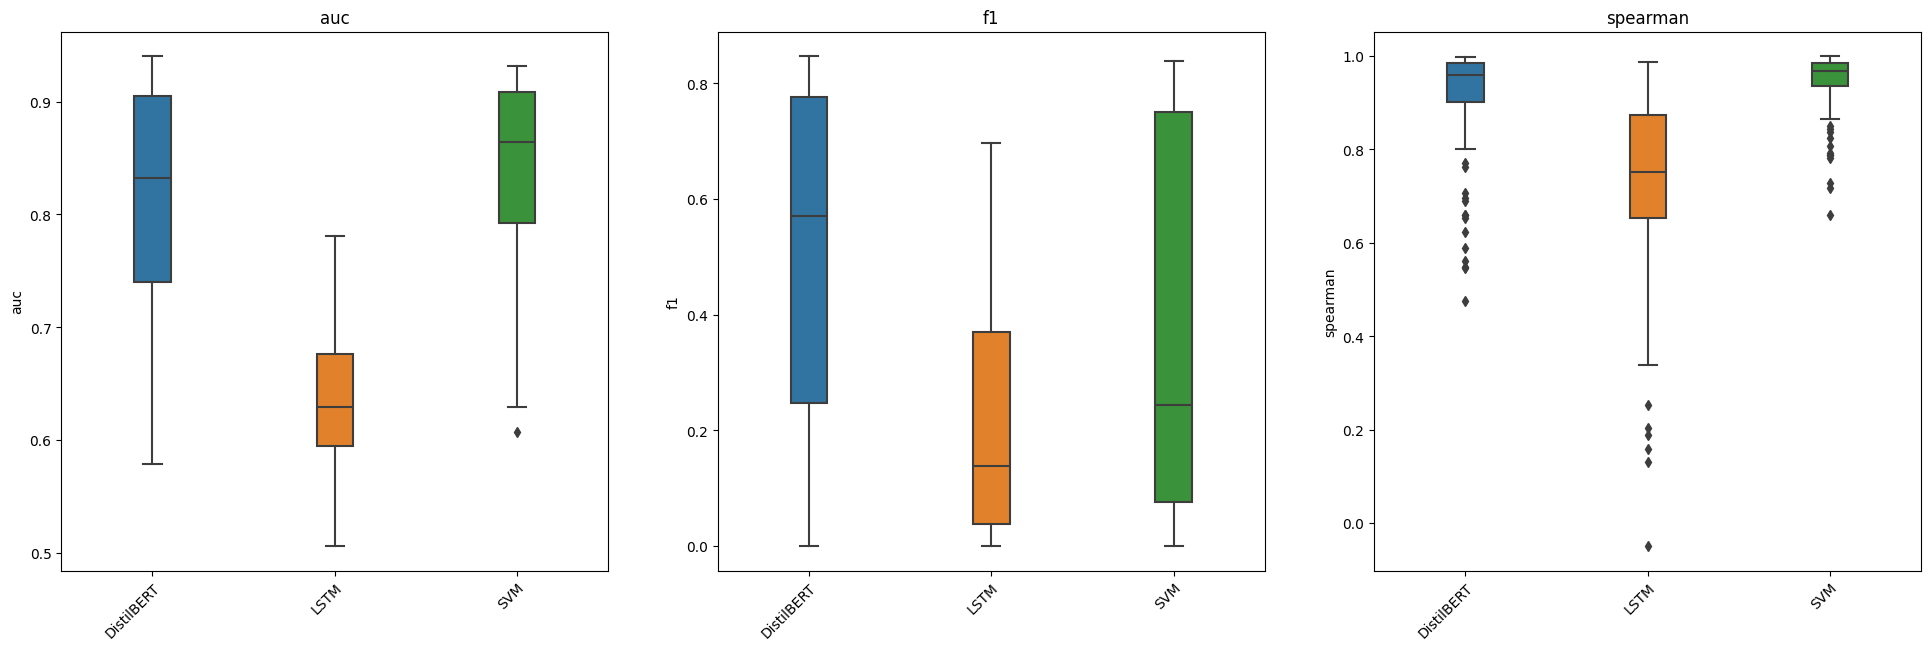

In [71]:
def boxplot(df, measures = list(df.columns[5:]), grouping = "Model name", title = None, relative = False):
    df2 = df[list(df.columns[:4]) + measures].reset_index(drop=True)
    n_col = 3 if len(measures)>3 else len(measures)
    fig, ax = plt.subplots(int(np.ceil((len(df2.columns)-4)/3)), n_col, figsize=(n_col*8,7 * int(np.ceil((len(df2.columns)-4)/3))))
    if n_col>1:
        ax = ax.flatten()
    
    if int(np.ceil((len(df2.columns)-4)/3))>1:
        plt.subplots_adjust(hspace=0.5)
    
    for i, measure in enumerate(df2.columns[4:]):
        axes = ax[i] if n_col>1 else ax
        if relative:
            axes.hlines(1,-1,len(np.unique(df[grouping]))+1, color="gray", alpha=0.3)
        sns.boxplot(x=grouping, y=measure,width = 0.2, data=df2, ax = axes)
        axes.set_title(measure)
        axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
        axes.set(xlabel=None)
    if n_col>1:
        for j in range(i + 1, len(ax)):
            fig.delaxes(ax[j])
    if title != None:
        plt.suptitle(title)
    plt.show()
boxplot(df, measures = ["auc", "f1", "spearman"], grouping = "Model name")

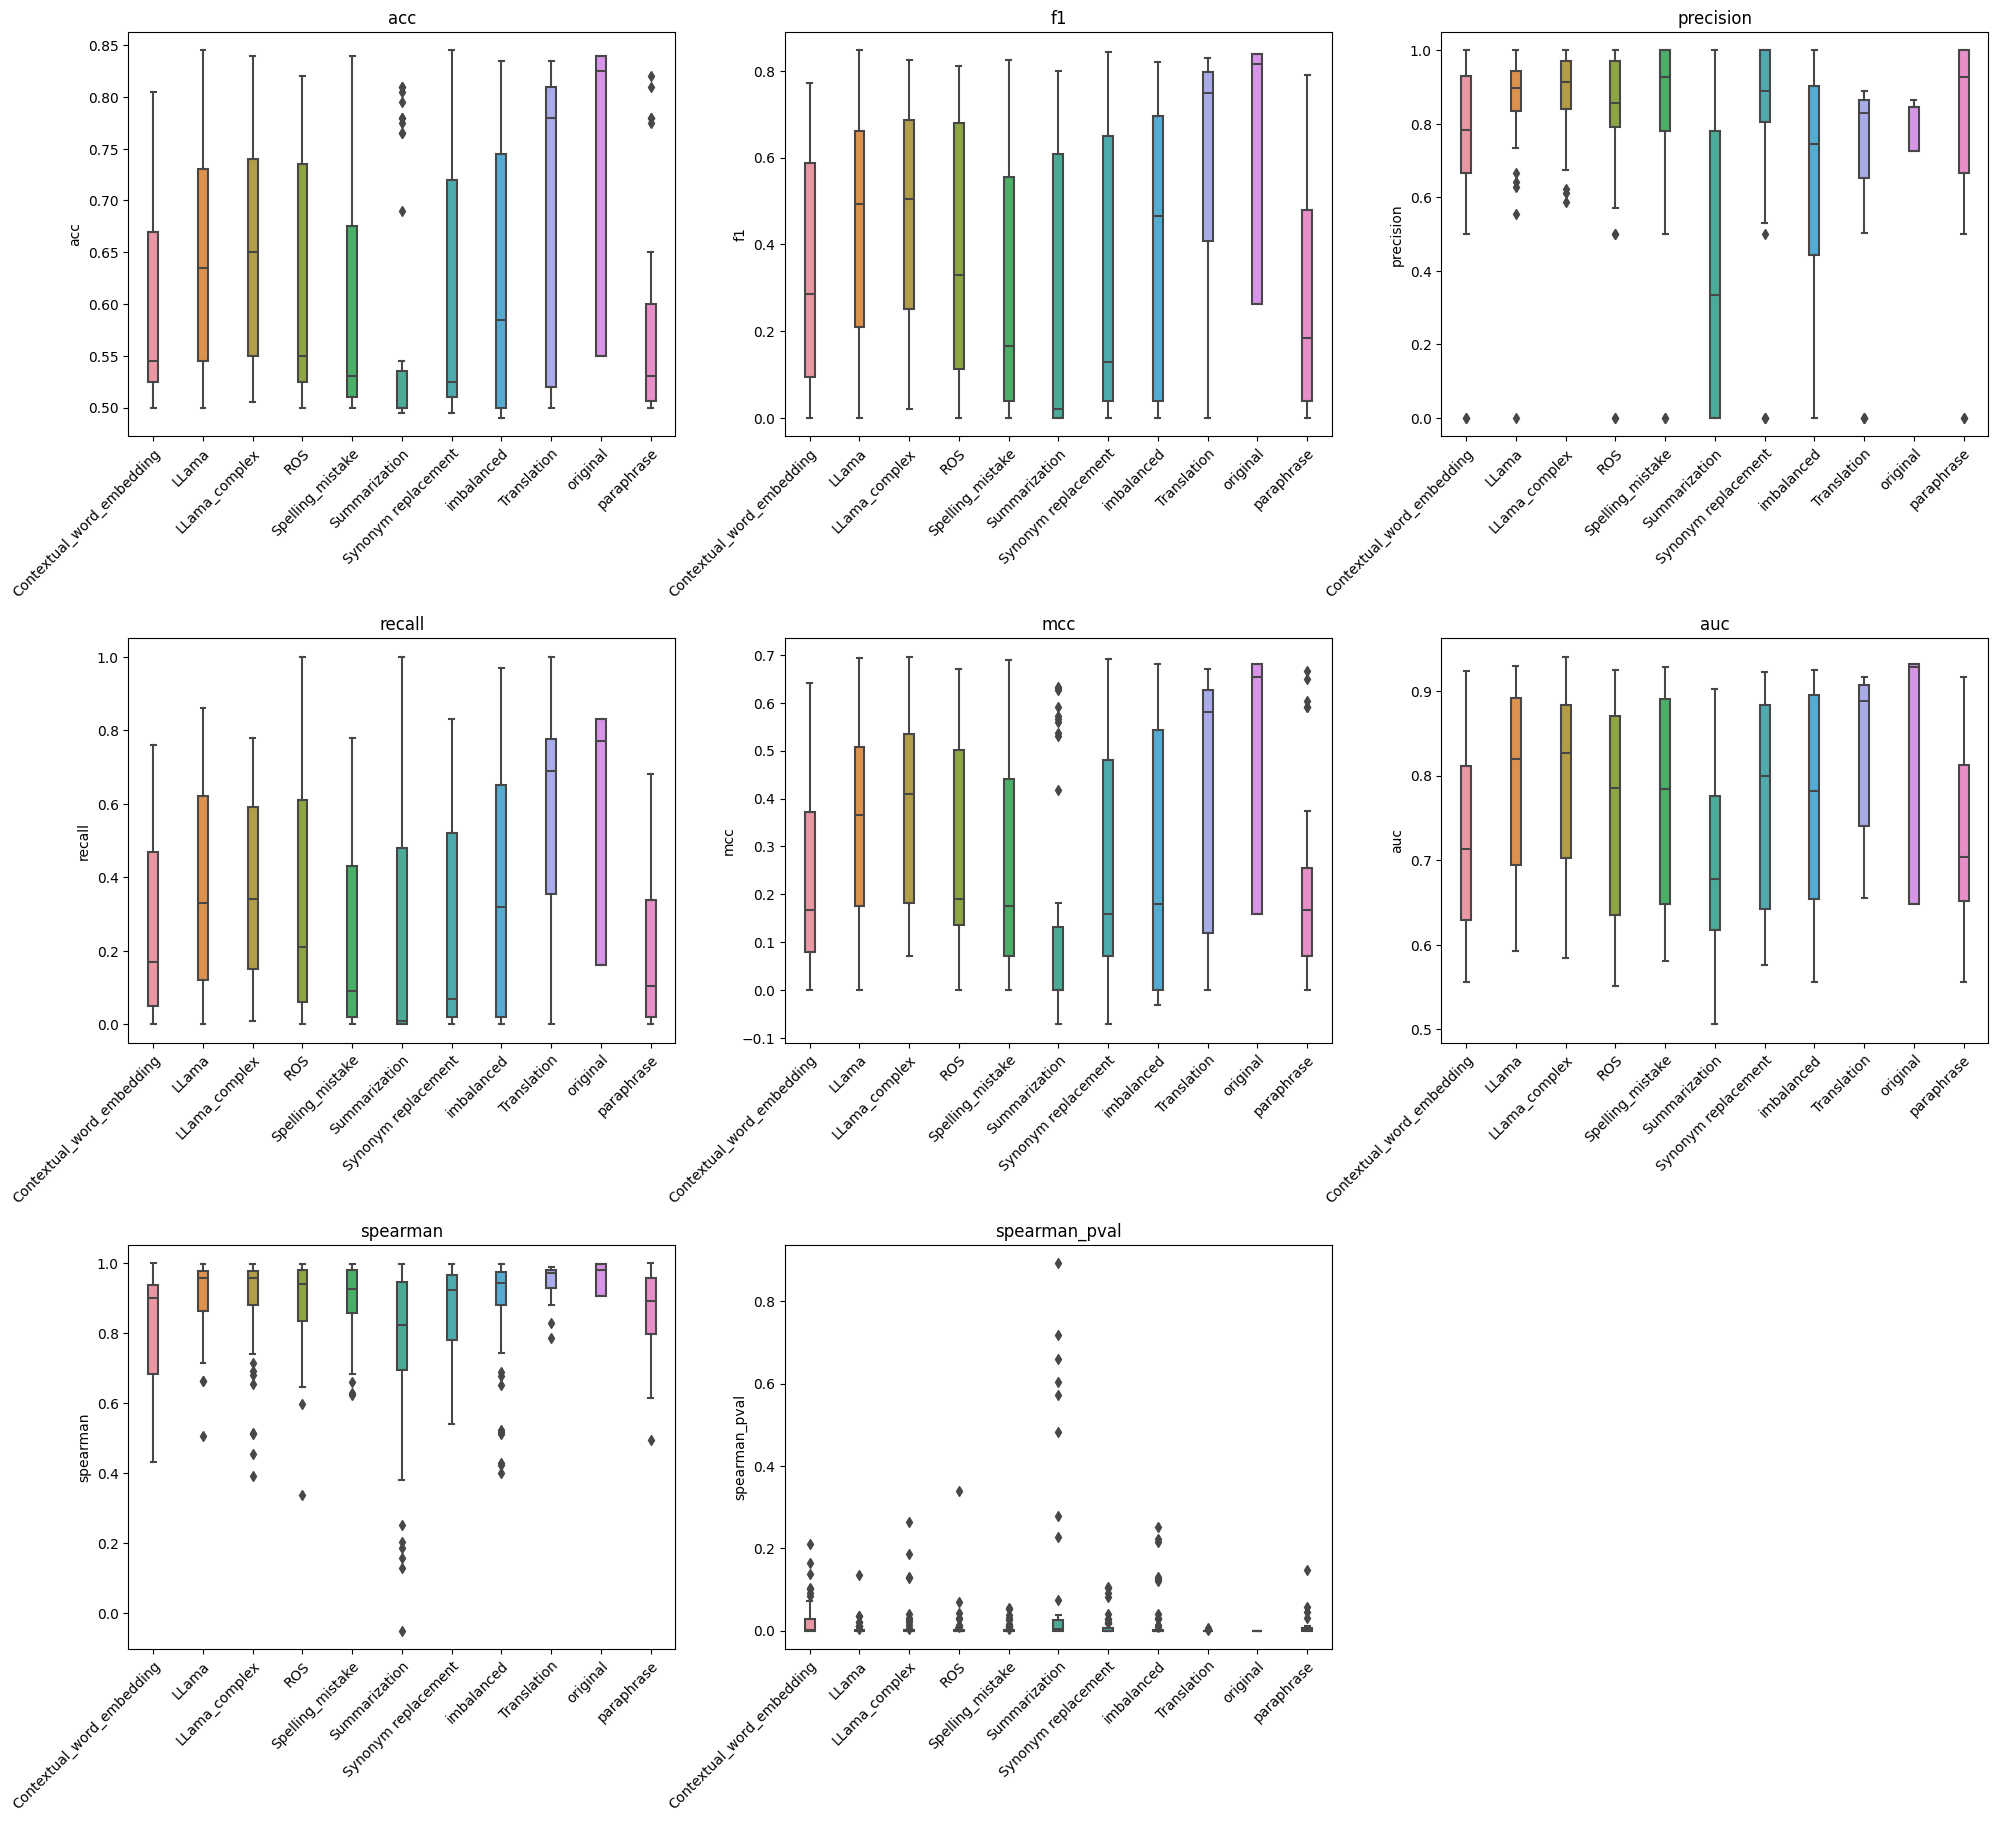

In [53]:
boxplot(df, grouping = "Balancing method")

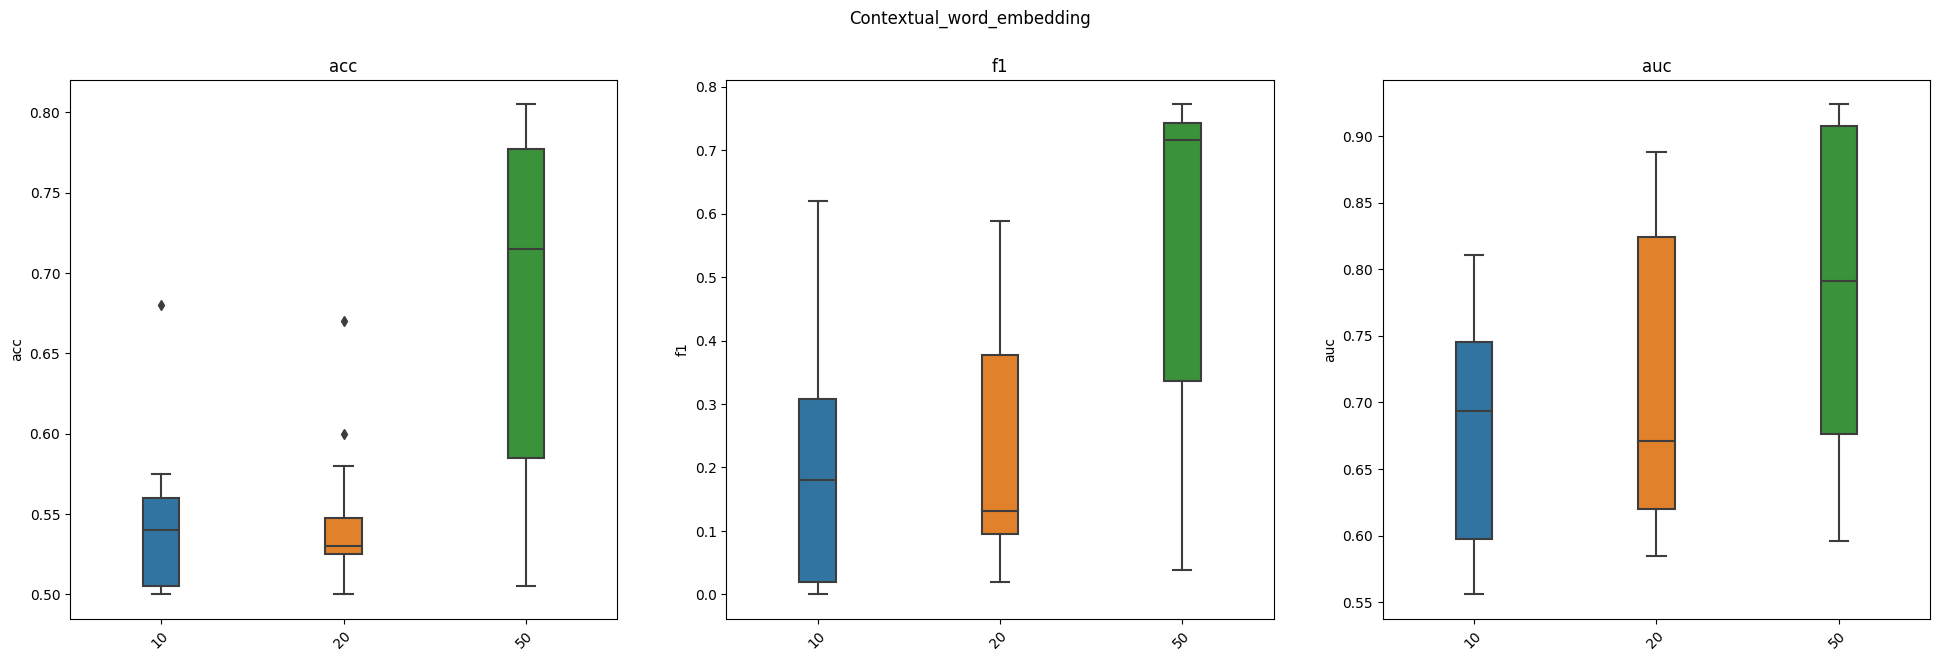

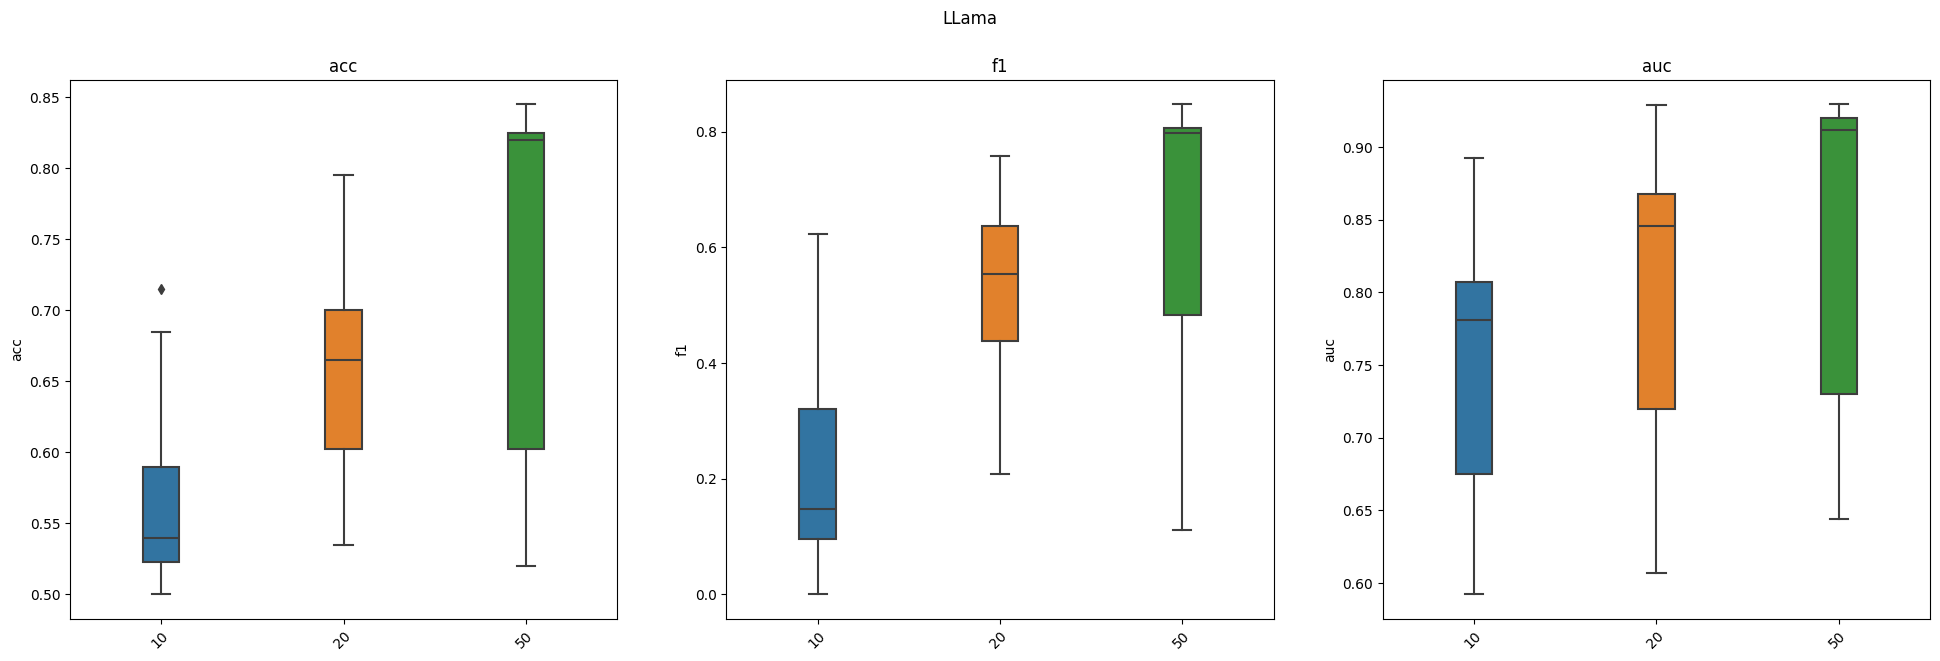

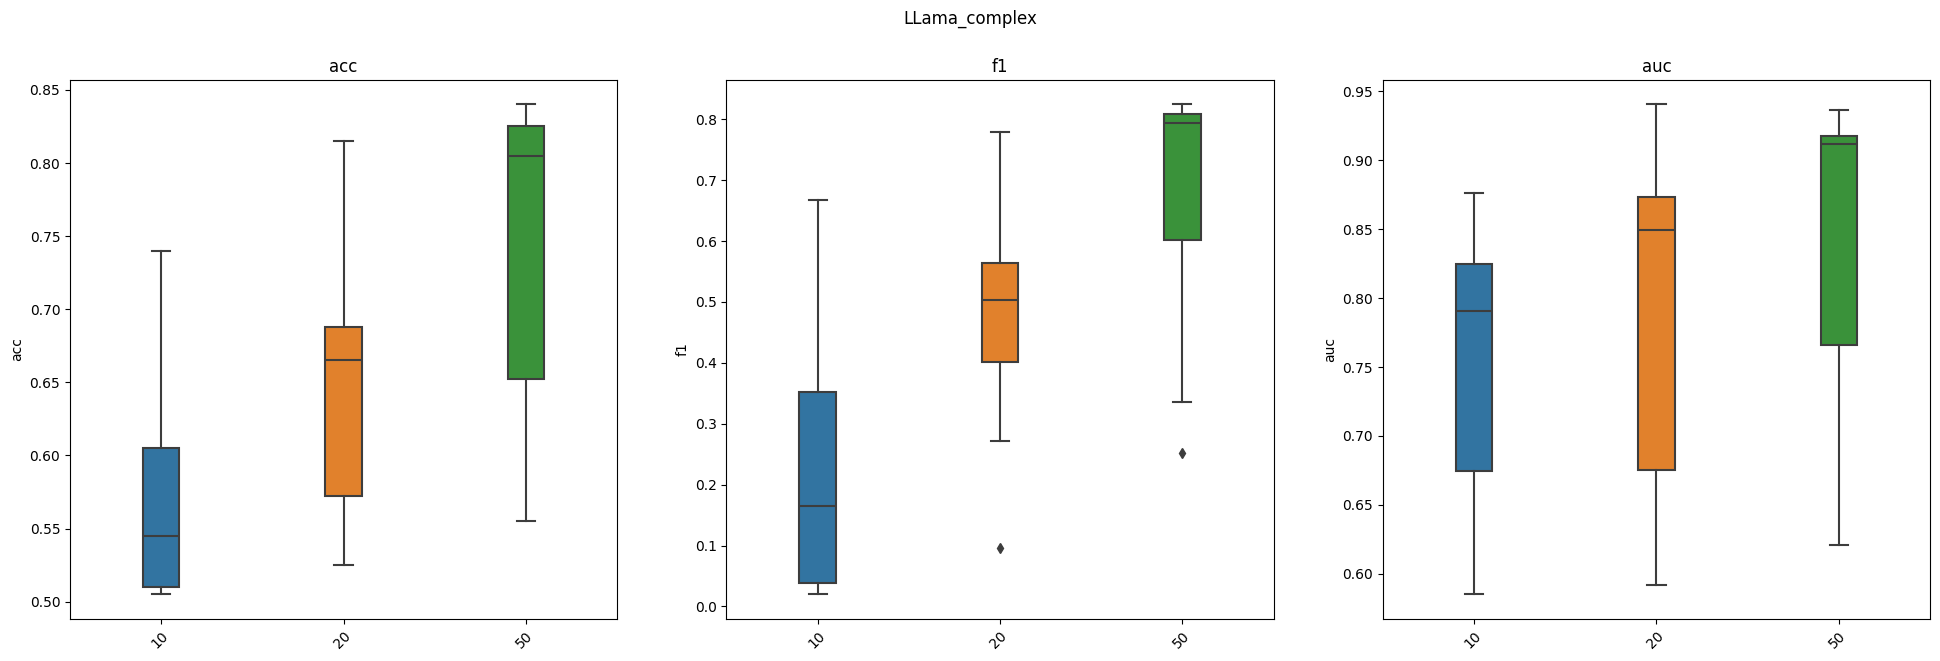

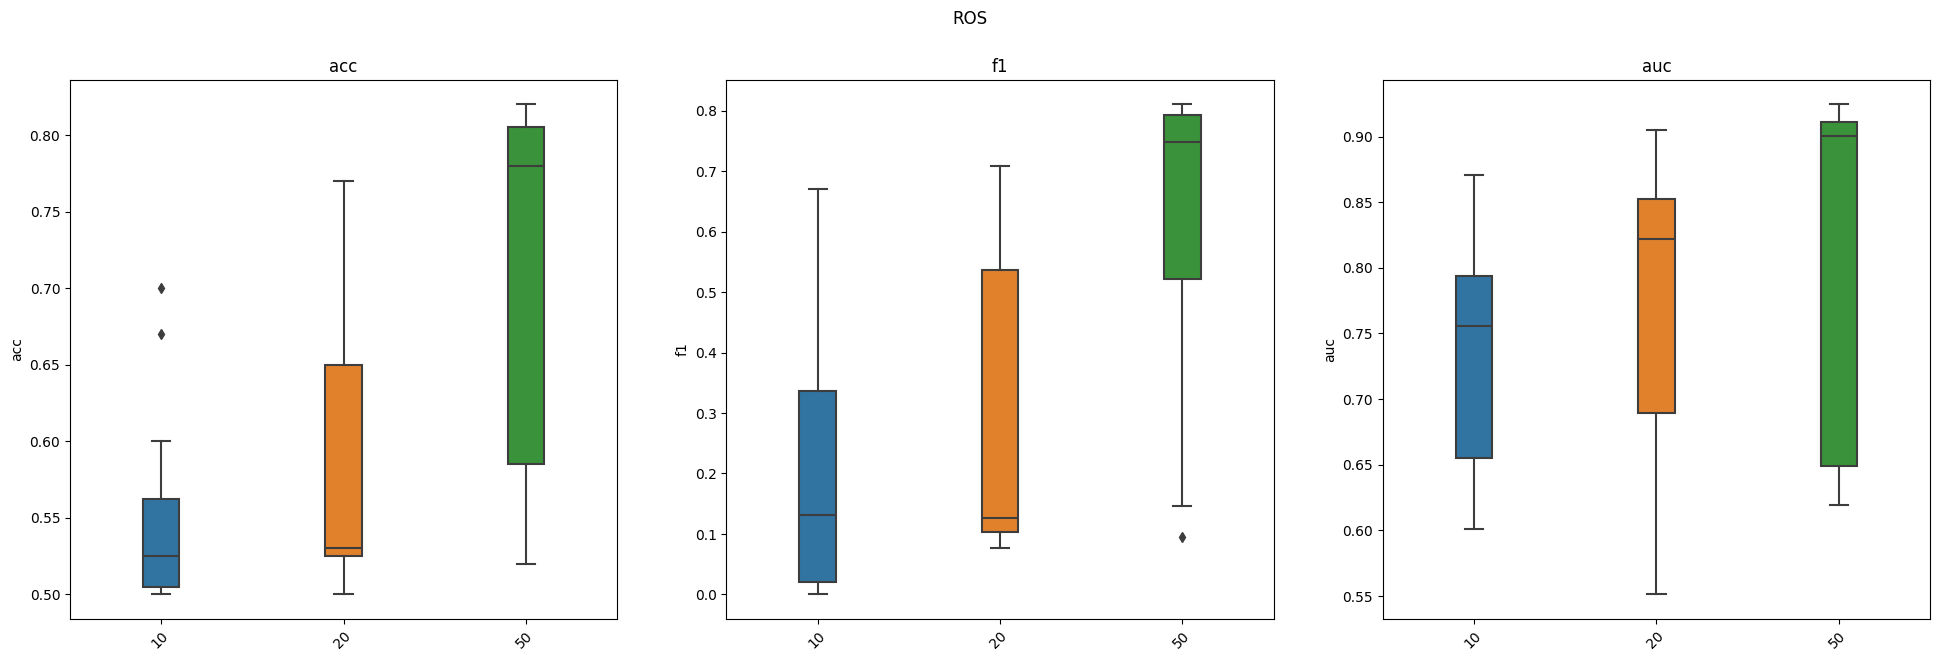

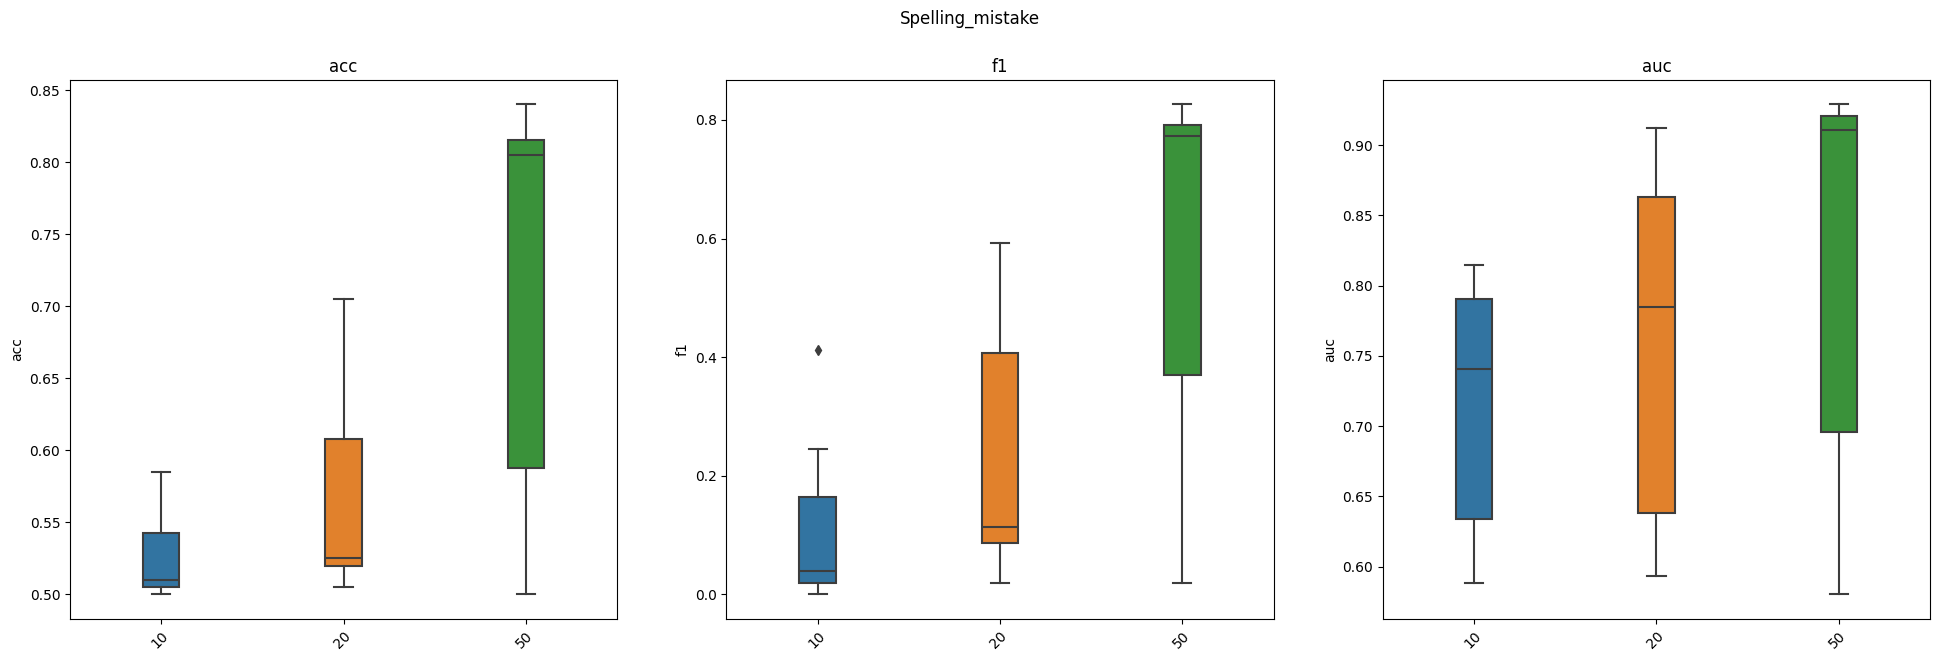

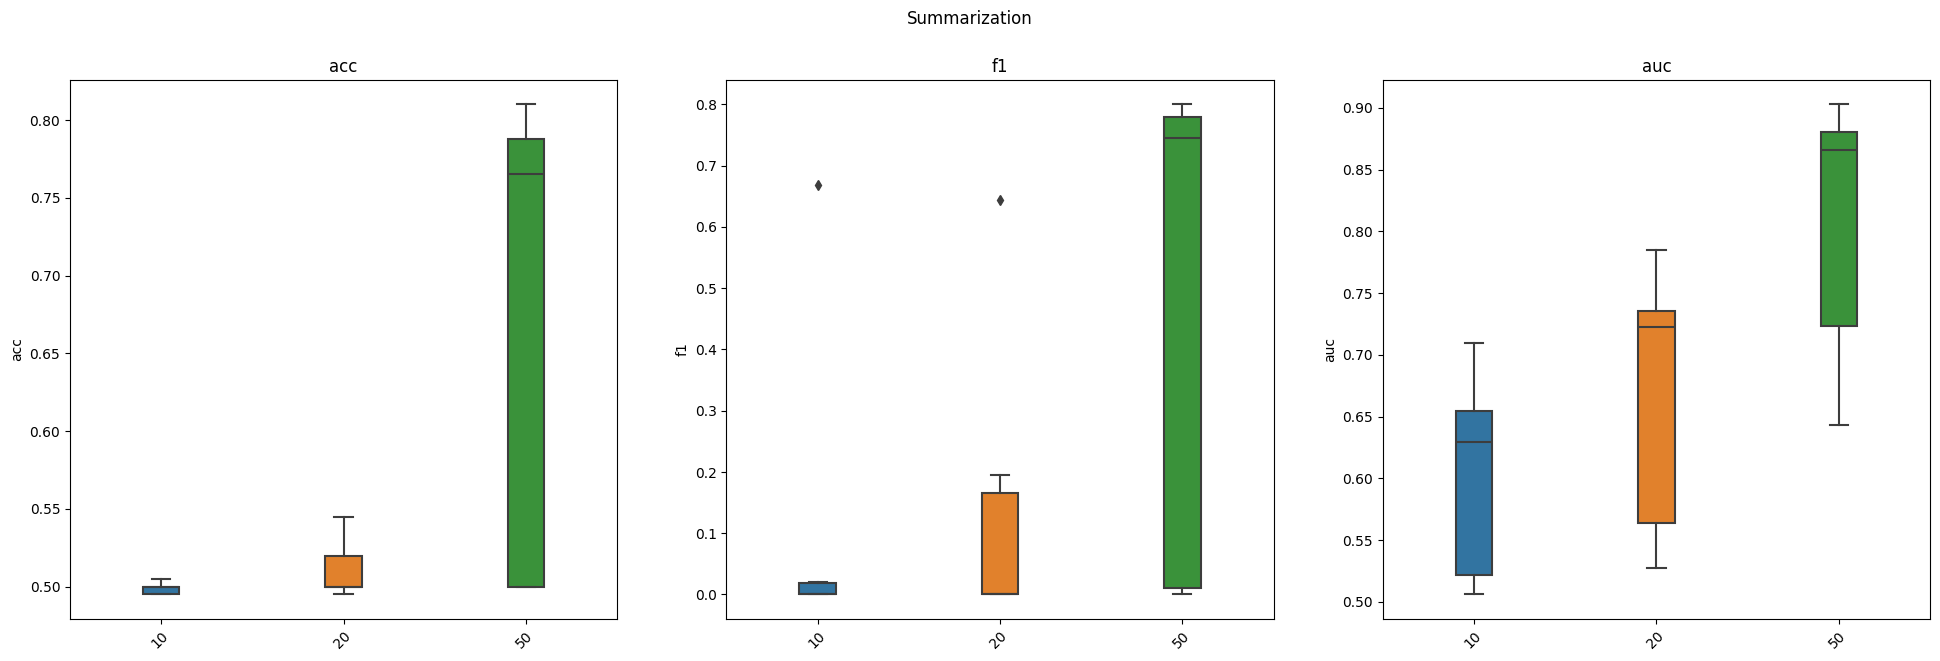

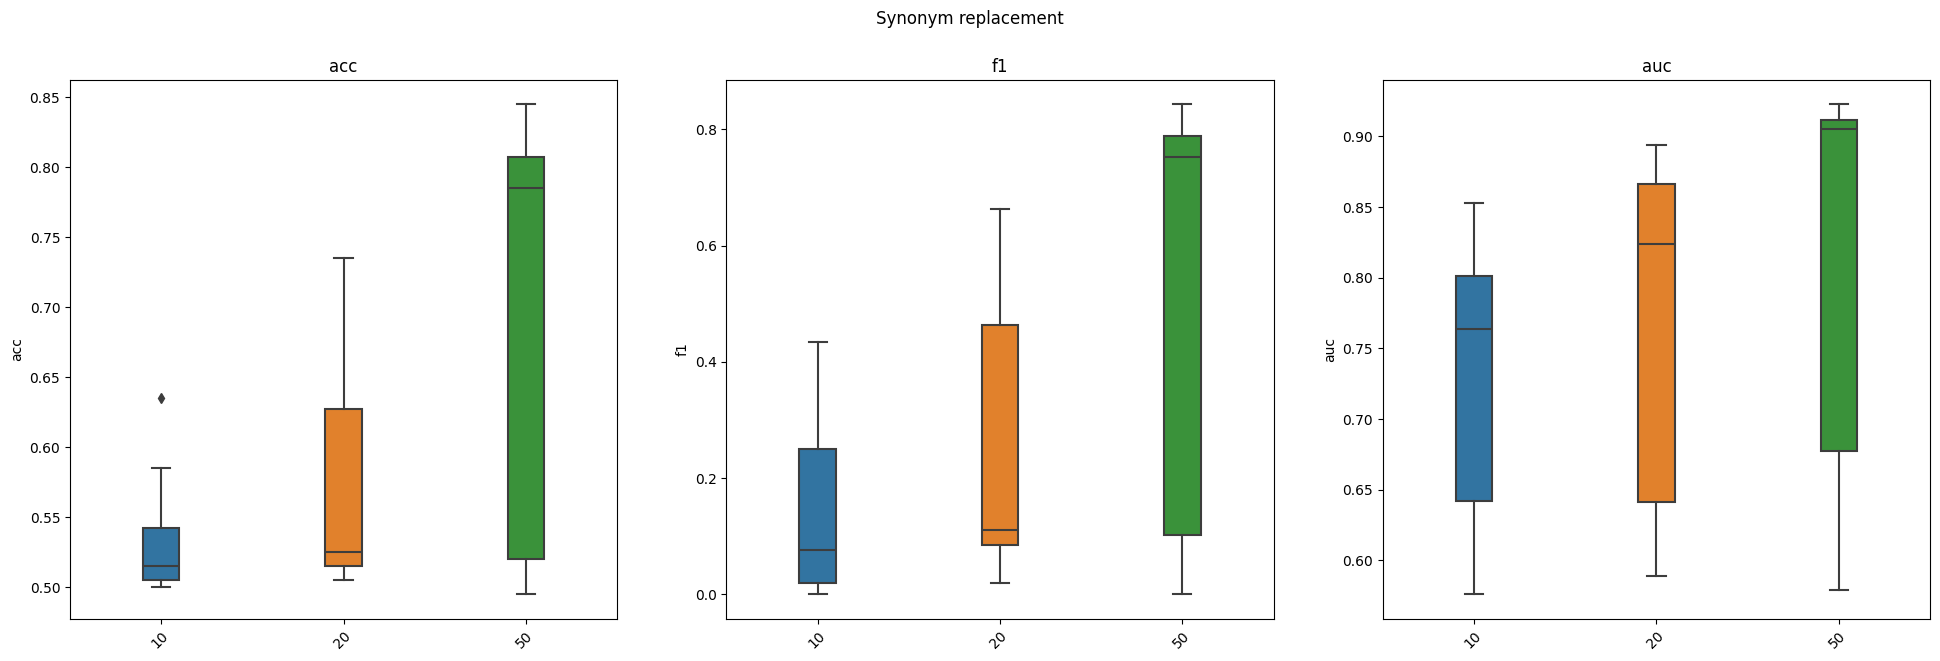

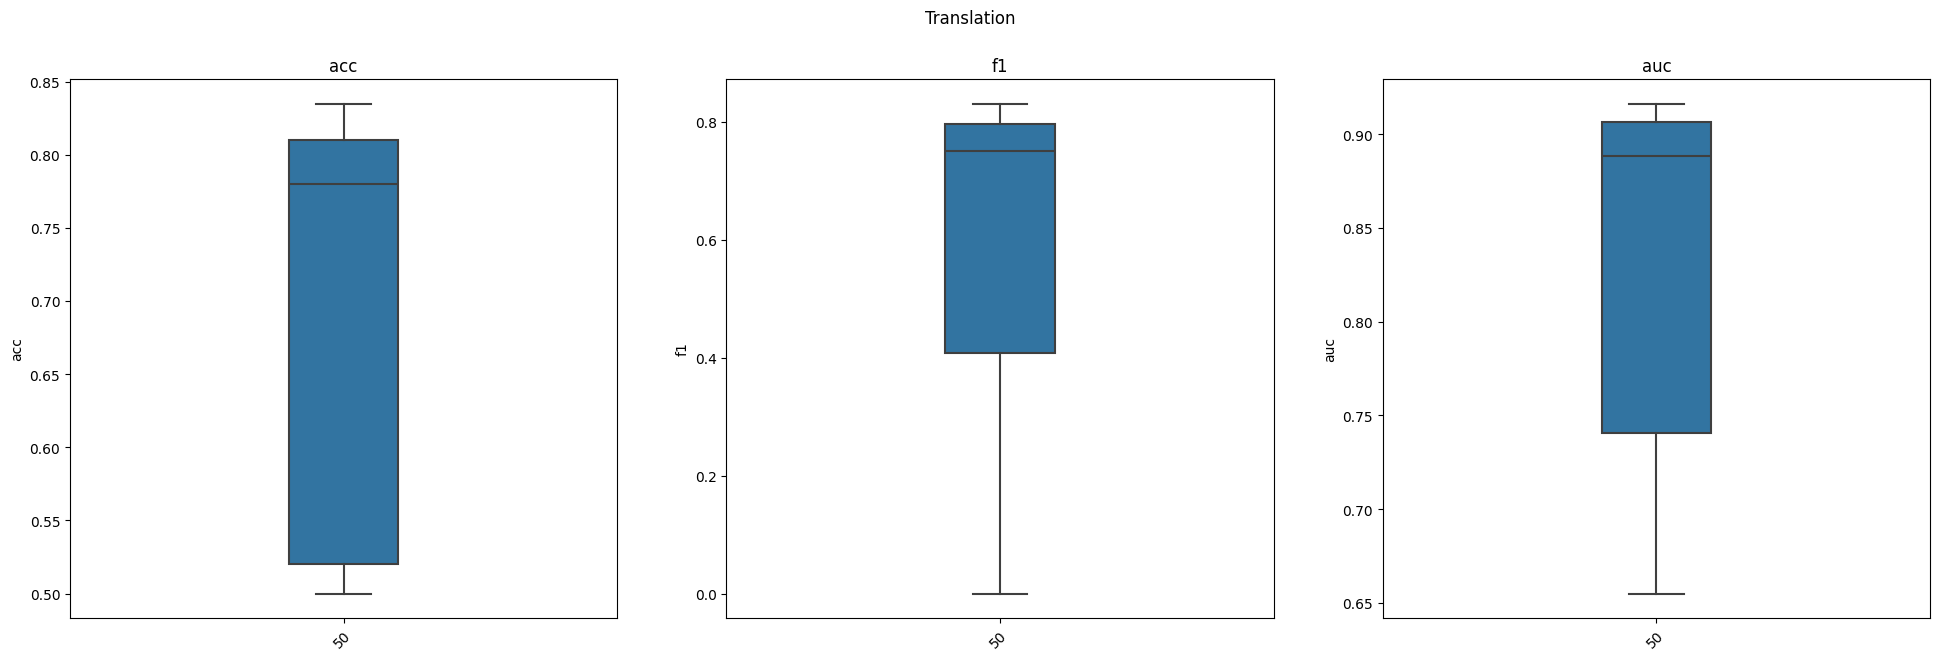

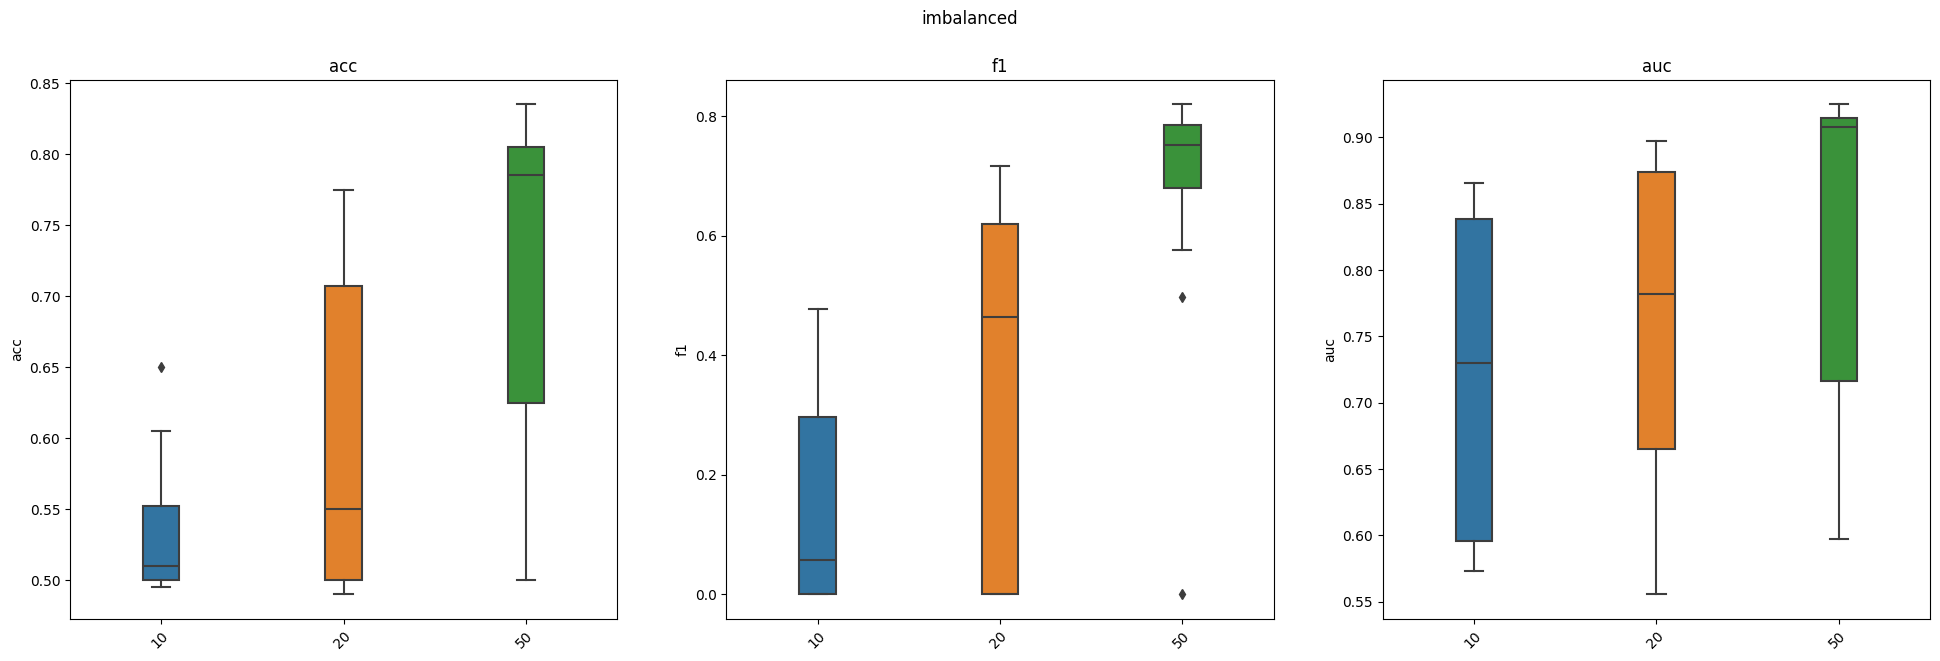

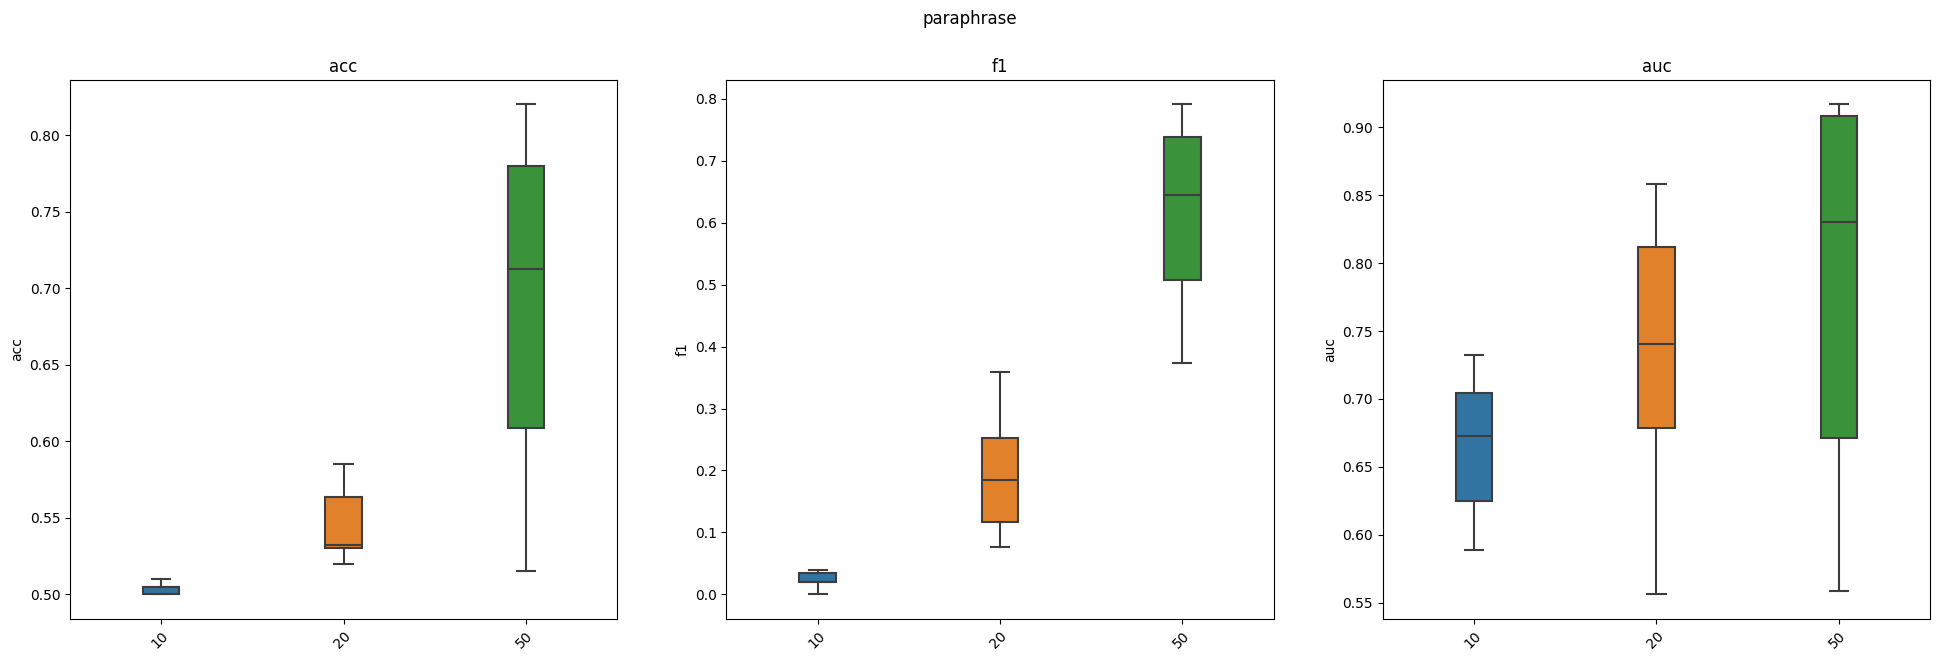

In [54]:
for method in np.unique(df["Balancing method"]):
    if method=="original":continue
    df_tmp = df[df["Balancing method"]==method].reset_index(drop=True)
    boxplot(df_tmp, ["acc", "f1", "auc"], grouping = "Imbalance %", title=method)

# Removal of bad models

In [55]:
df_good = df[(df["acc"]>0.6) & (df["f1"]!=0)]
print(f"We remove {len(df)-len(df_good)} ({np.round((len(df)-len(df_good))/len(df)*100, 1)}%) of all models:")
for model in np.unique(df["Model name"]):
    df_tmp = df[df["Model name"]==model]
    df_tmp_good = df_good[df_good["Model name"]==model]
    print(f"- {len(df_tmp)-len(df_tmp_good)} ({np.round((len(df_tmp)-len(df_tmp_good))/len(df_tmp)*100, 1)}%) of {model} models")

We remove 248 (60.5%) of all models:
- 46 (36.5%) of DistilBERT models
- 129 (90.8%) of LSTM models
- 73 (51.4%) of SVM models


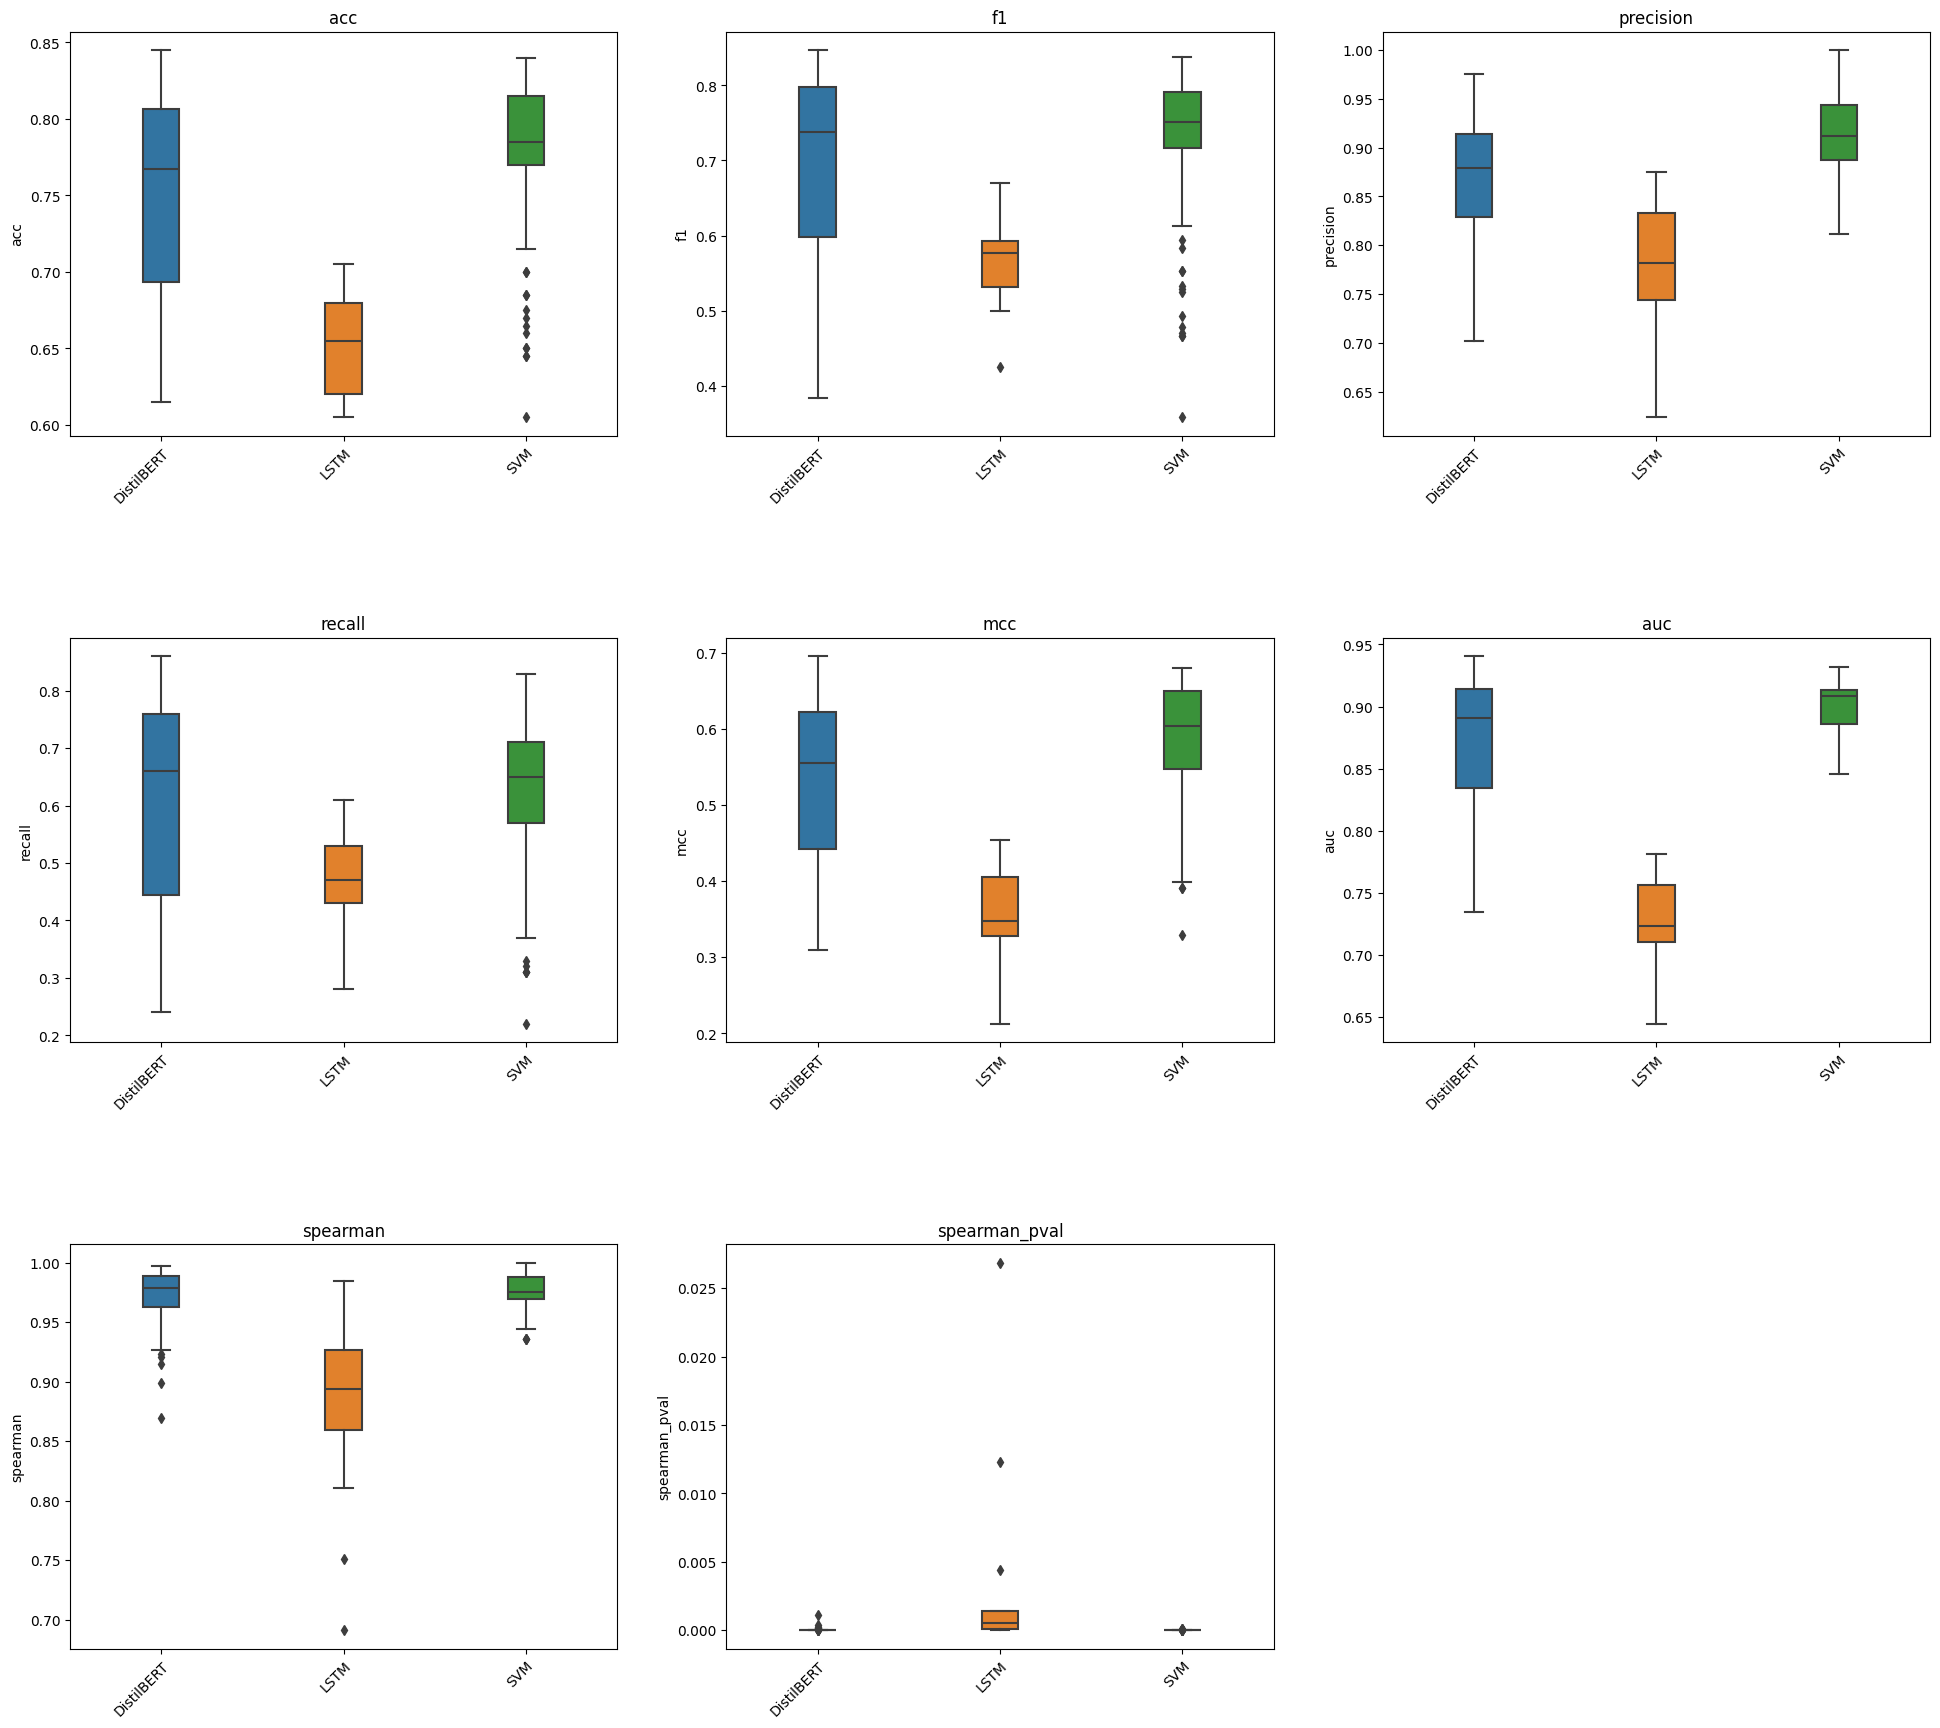

In [56]:
boxplot(df_good, grouping = "Model name")

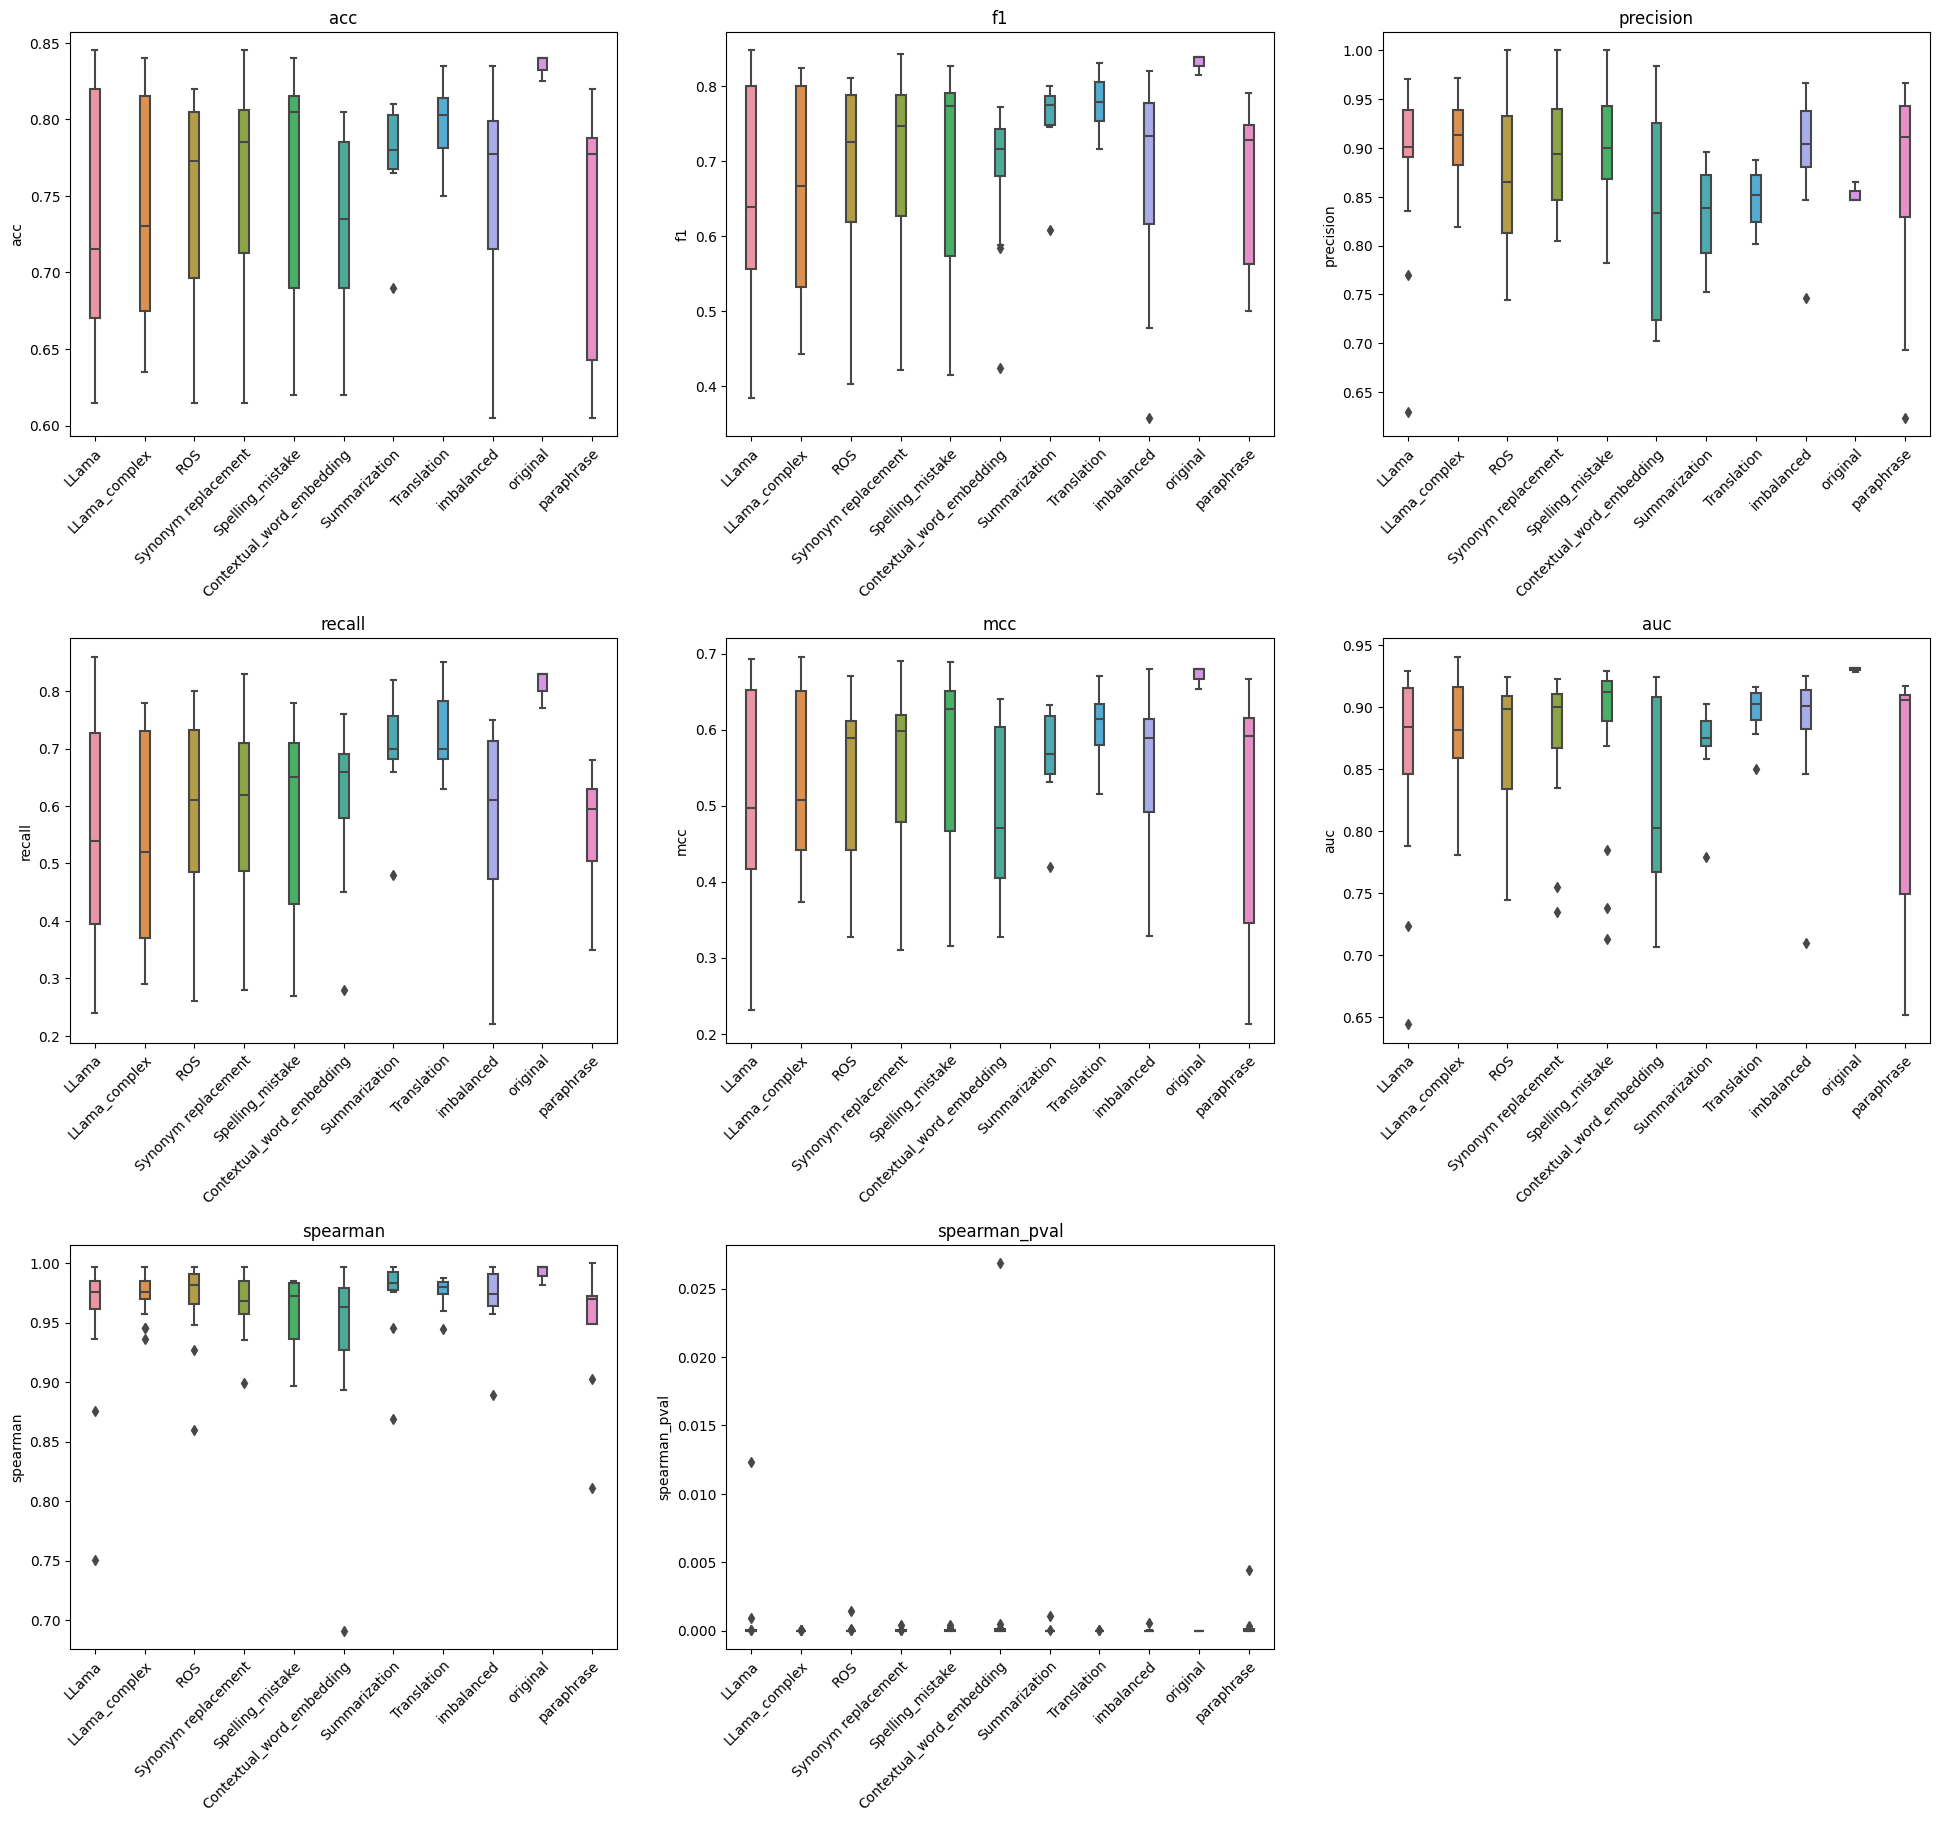

In [57]:
boxplot(df_good, grouping = "Balancing method")

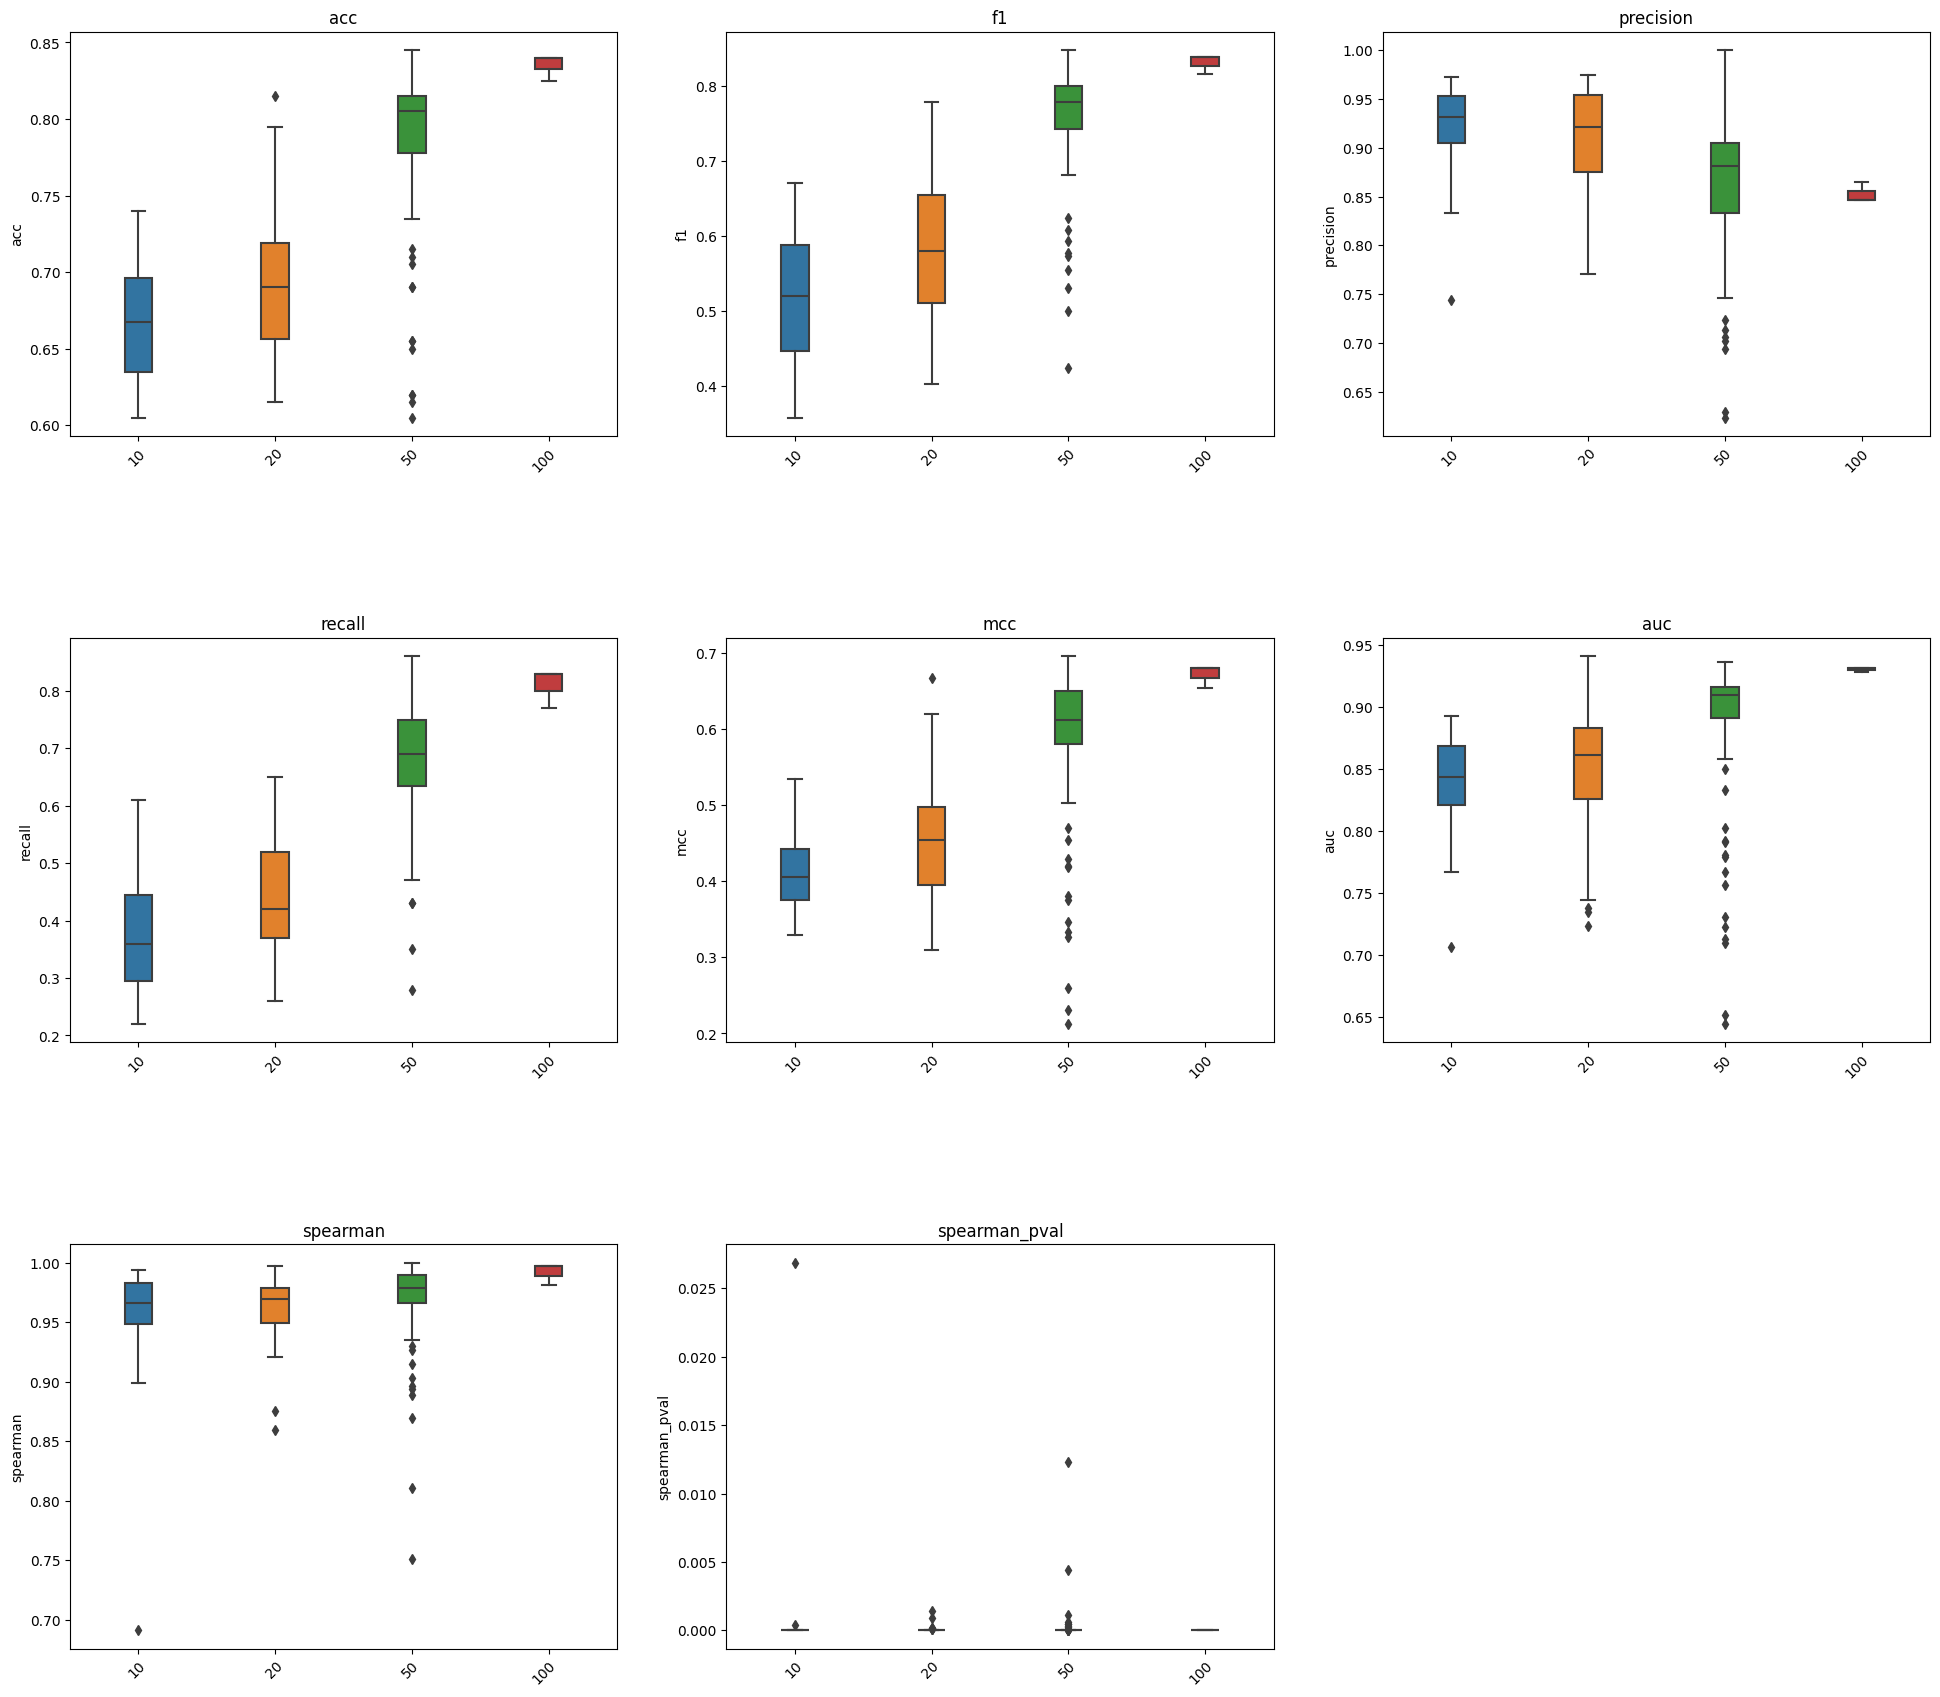

In [58]:
boxplot(df_good, grouping = "Imbalance %")

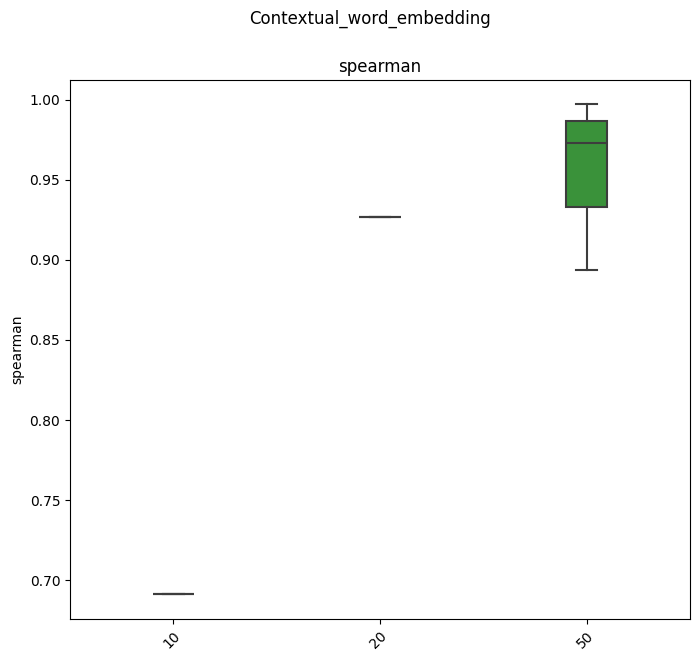

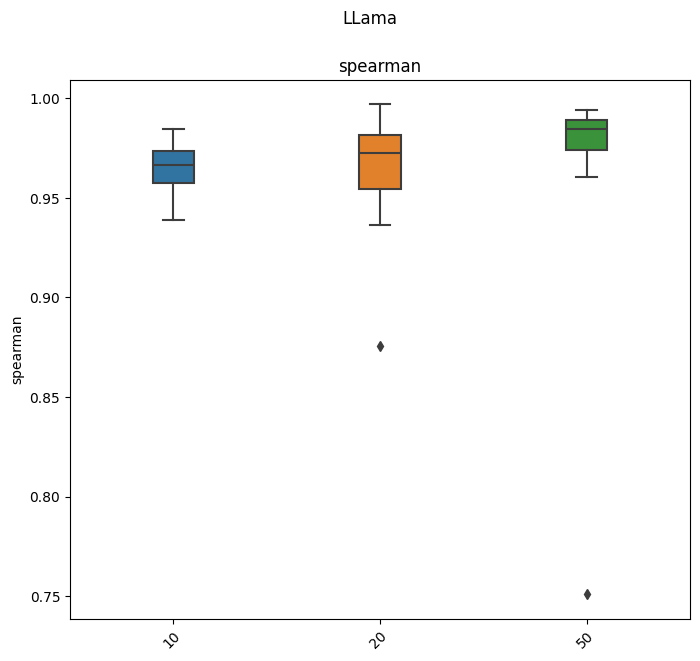

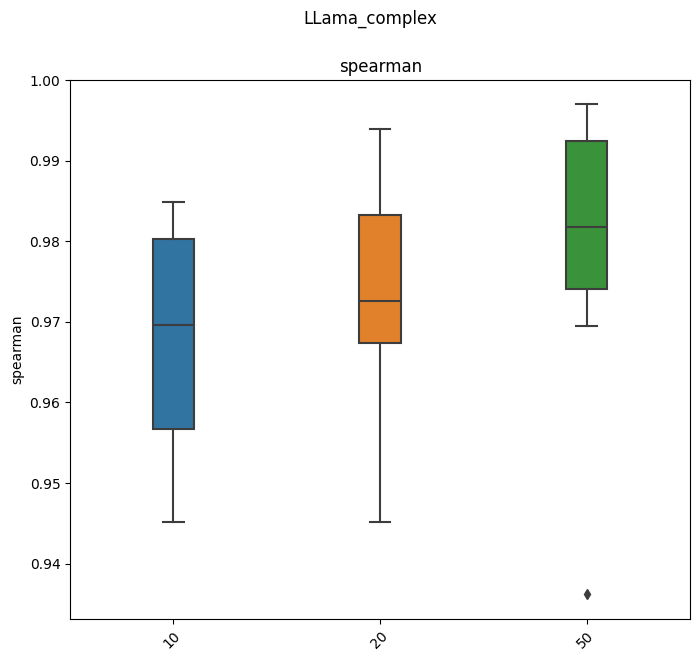

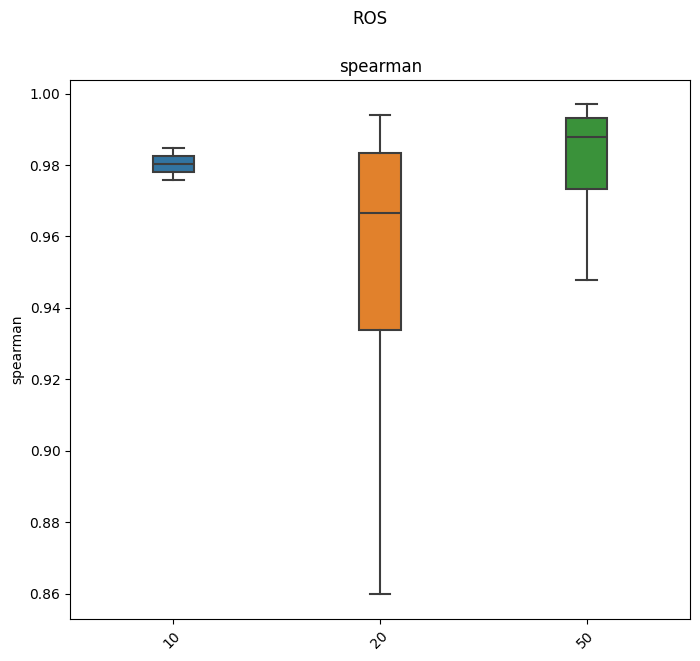

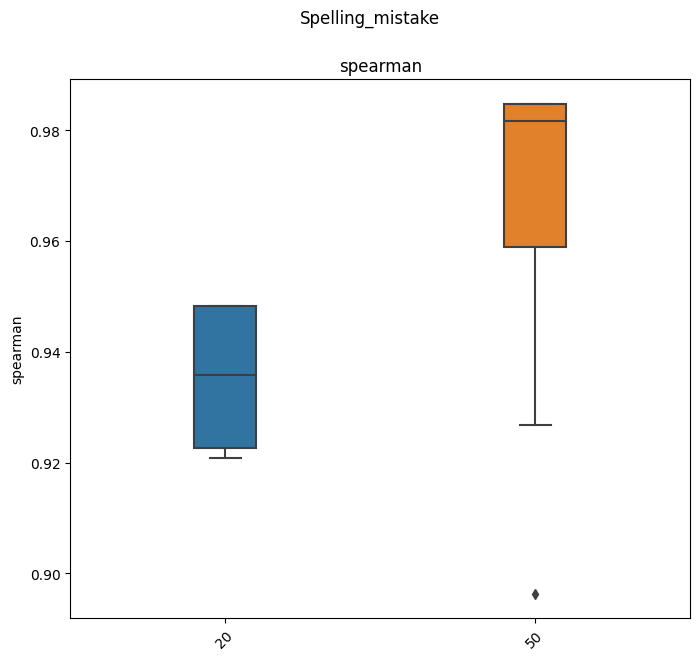

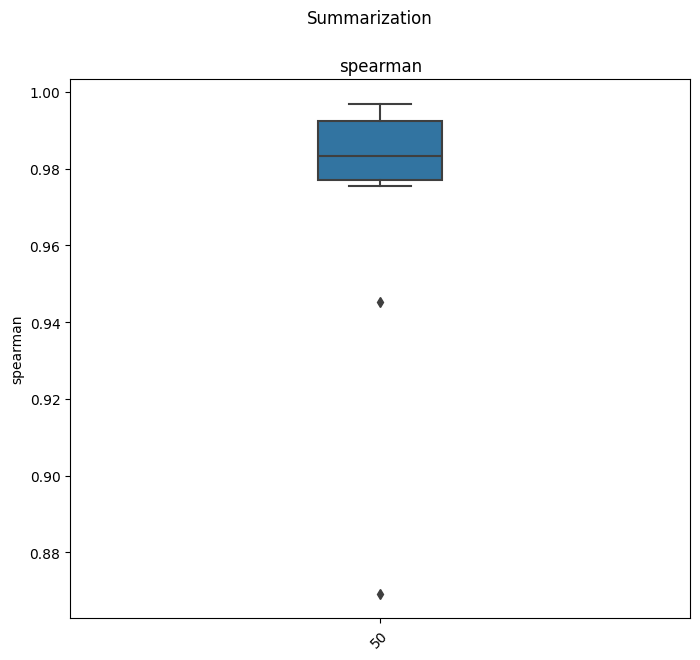

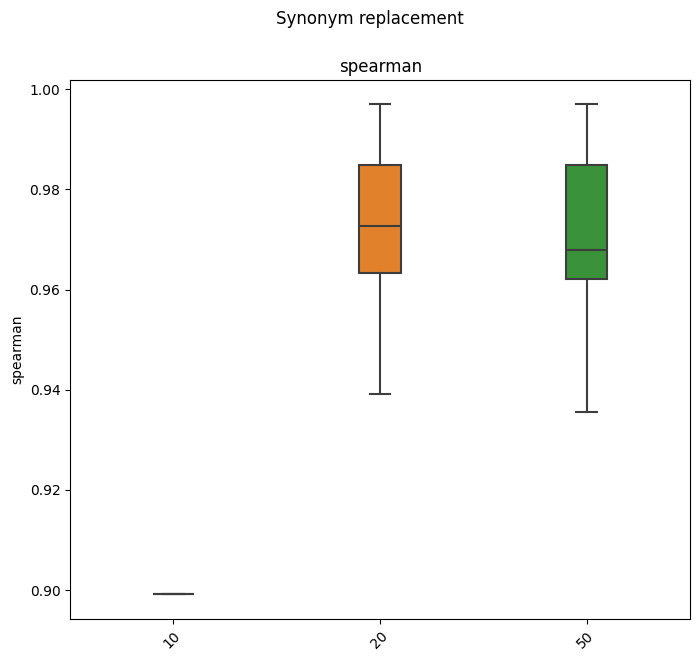

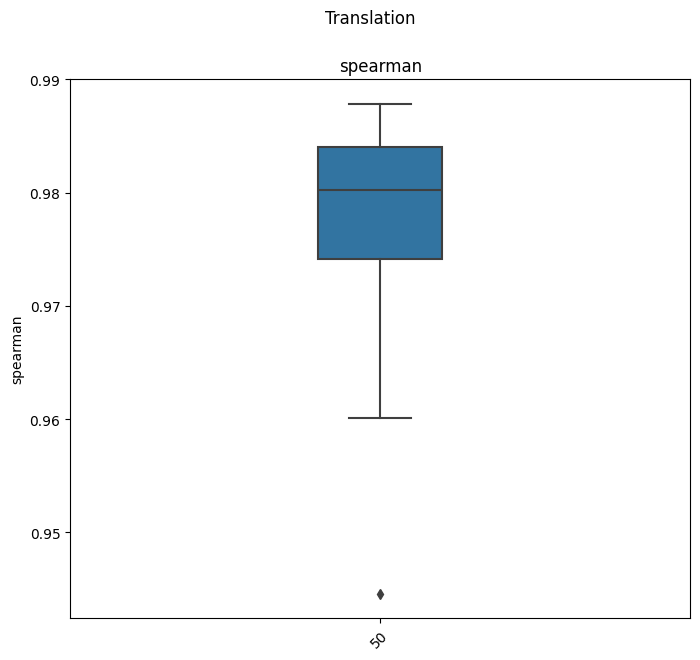

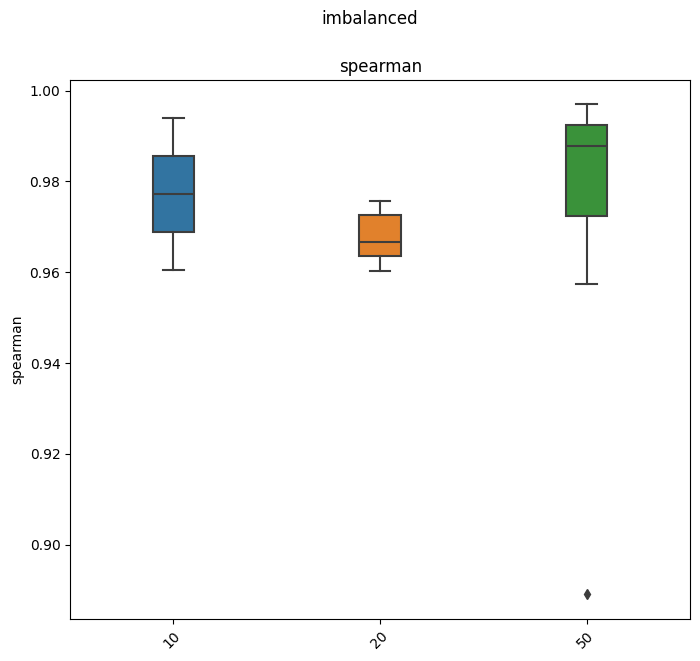

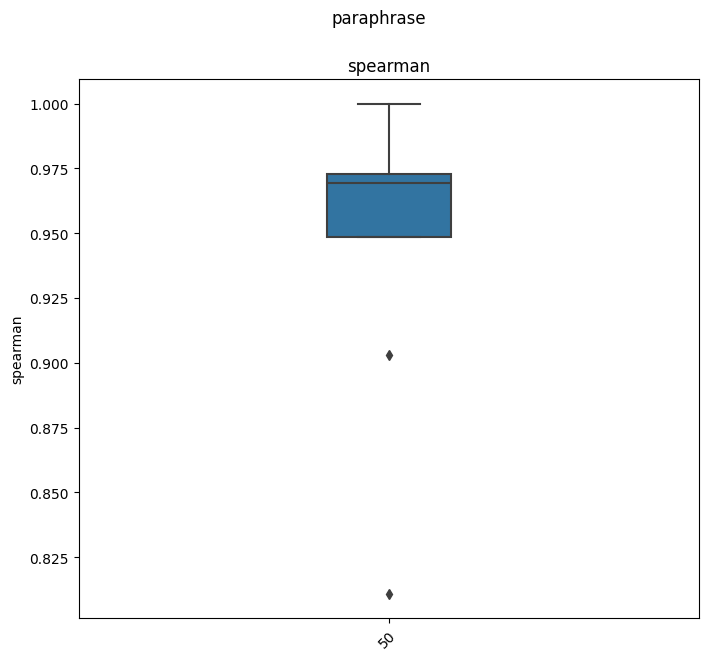

In [59]:
for method in np.unique(df["Balancing method"]):
    if method=="original":continue
    df_tmp = df_good[df_good["Balancing method"]==method].reset_index(drop=True)
    boxplot(df_tmp, ["spearman"], grouping = "Imbalance %", title=method)

# Let's compare relative measure value of balanced model compared to imbalanced model

This approach will further limit the size of testing sample, as it requires both imbalanced and balanced model to be good models. If balanced model is good and its corresponding bad model is bad then neither of those models will be taken in the consideration in the following analysis.

In [ ]:
# Generating dataset with relative values of model performance measures
results = []
for imbalance_perc in np.unique(df_good["Imbalance %"]):
    for model_id in np.unique(df_good["Model ID"]):
        if (model_id=="original") or imbalance_perc==100: continue
        for model_name in np.unique(df_good["Model name"]):
            # Filtering model family with common model id, model name and imbalance percentage
            df_tmp = df_good[(df_good["Model ID"] == model_id) & (df_good["Model name"] == model_name) & (df_good["Imbalance %"] == imbalance_perc)].reset_index(drop=True)
            if "imbalanced" in df_tmp["Balancing method"].values:
                # Saving imbalanced model stats
                imbalanced = df_tmp[df_tmp["Balancing method"] == "imbalanced"]
                imbalanced.reset_index(drop=True)
                # Filtering balanced models stats
                balanced = df_tmp[df_tmp["Balancing method"] != "imbalanced"].reset_index(drop=True)
                # Calculating ratio of balanced to imbalanced
                df_tmp = pd.concat([balanced.iloc[:,:5], balanced.iloc[:,5:]/imbalanced.iloc[:,5:].values], axis=1)
                results.append(df_tmp)
        
df_relative = pd.concat(results)
df_relative

,Unnamed: 0,Balancing method,Imbalance %,Model name,Model ID,acc,f1,precision,recall,mcc,auc,spearman,spearman_pval
0,49,LLama,20,SVM,0,0.921429,0.784005,1.024793,0.704545,0.834190,0.979800,1.021970,0.031264
1,59,LLama_complex,20,SVM,0,0.921429,0.784005,1.024793,0.704545,0.834190,0.989451,1.009353,0.323582
0,46,LLama,20,SVM,1,0.979021,0.952778,0.996970,0.933333,0.952133,0.979733,0.978124,12.185426
1,88,LLama_complex,20,SVM,1,0.944056,0.869544,0.990883,0.822222,0.871062,0.989233,1.003044,0.594972
0,27,LLama,20,SVM,2,0.892617,0.777332,0.970548,0.698113,0.753066,0.977775,0.996794,1.534382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,68,Spelling_mistake,50,SVM,4,1.000000,0.968905,1.136986,0.863014,1.060722,0.990632,0.996890,2.447473
5,120,Summarization,50,SVM,4,0.950920,0.934757,0.974560,0.904110,0.884008,0.952778,0.987578,15.960090
6,6,Synonym replacement,50,SVM,4,0.993865,0.959411,1.136986,0.849315,1.048450,0.985948,0.947045,734.353310
7,124,Translation,50,SVM,4,0.957055,0.936467,0.998704,0.890411,0.907148,0.956972,1.000075,0.975919


In [80]:
key, value = np.unique(df_relative["Model name"], return_counts = True)
print("Sample with relative model metrics contains: ")
for k, v in zip(key, value):
    print(f"- {v} {k} models")

Sample with relative model metrics contains: 
- 40 DistilBERT models
- 55 SVM models


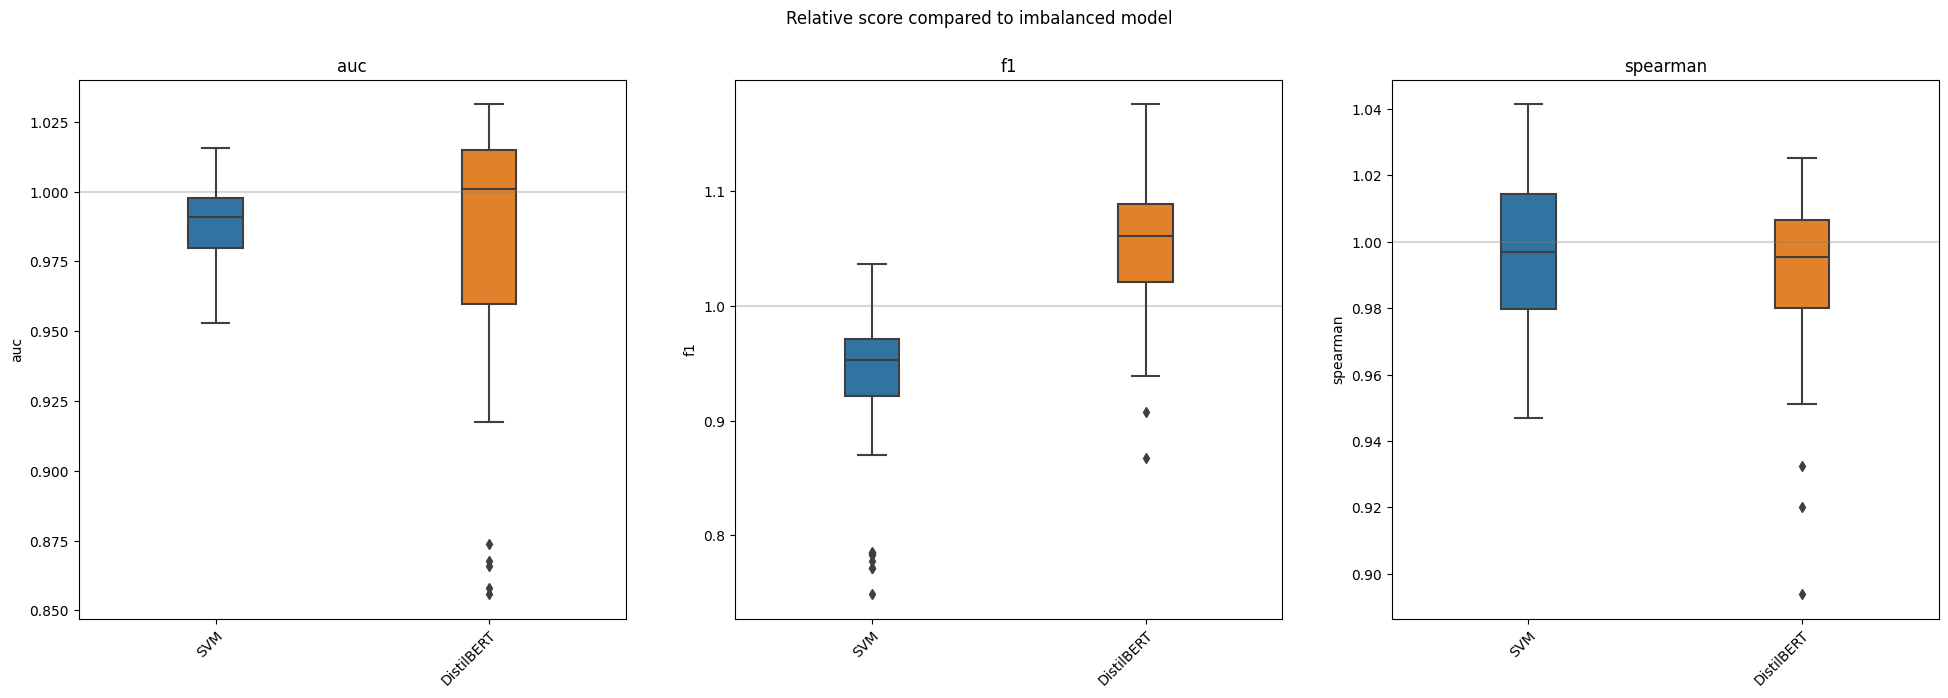

In [79]:
boxplot(df_relative, ["auc", "f1", "spearman"], grouping = "Model name", title="Relative score compared to imbalanced model", relative = True)

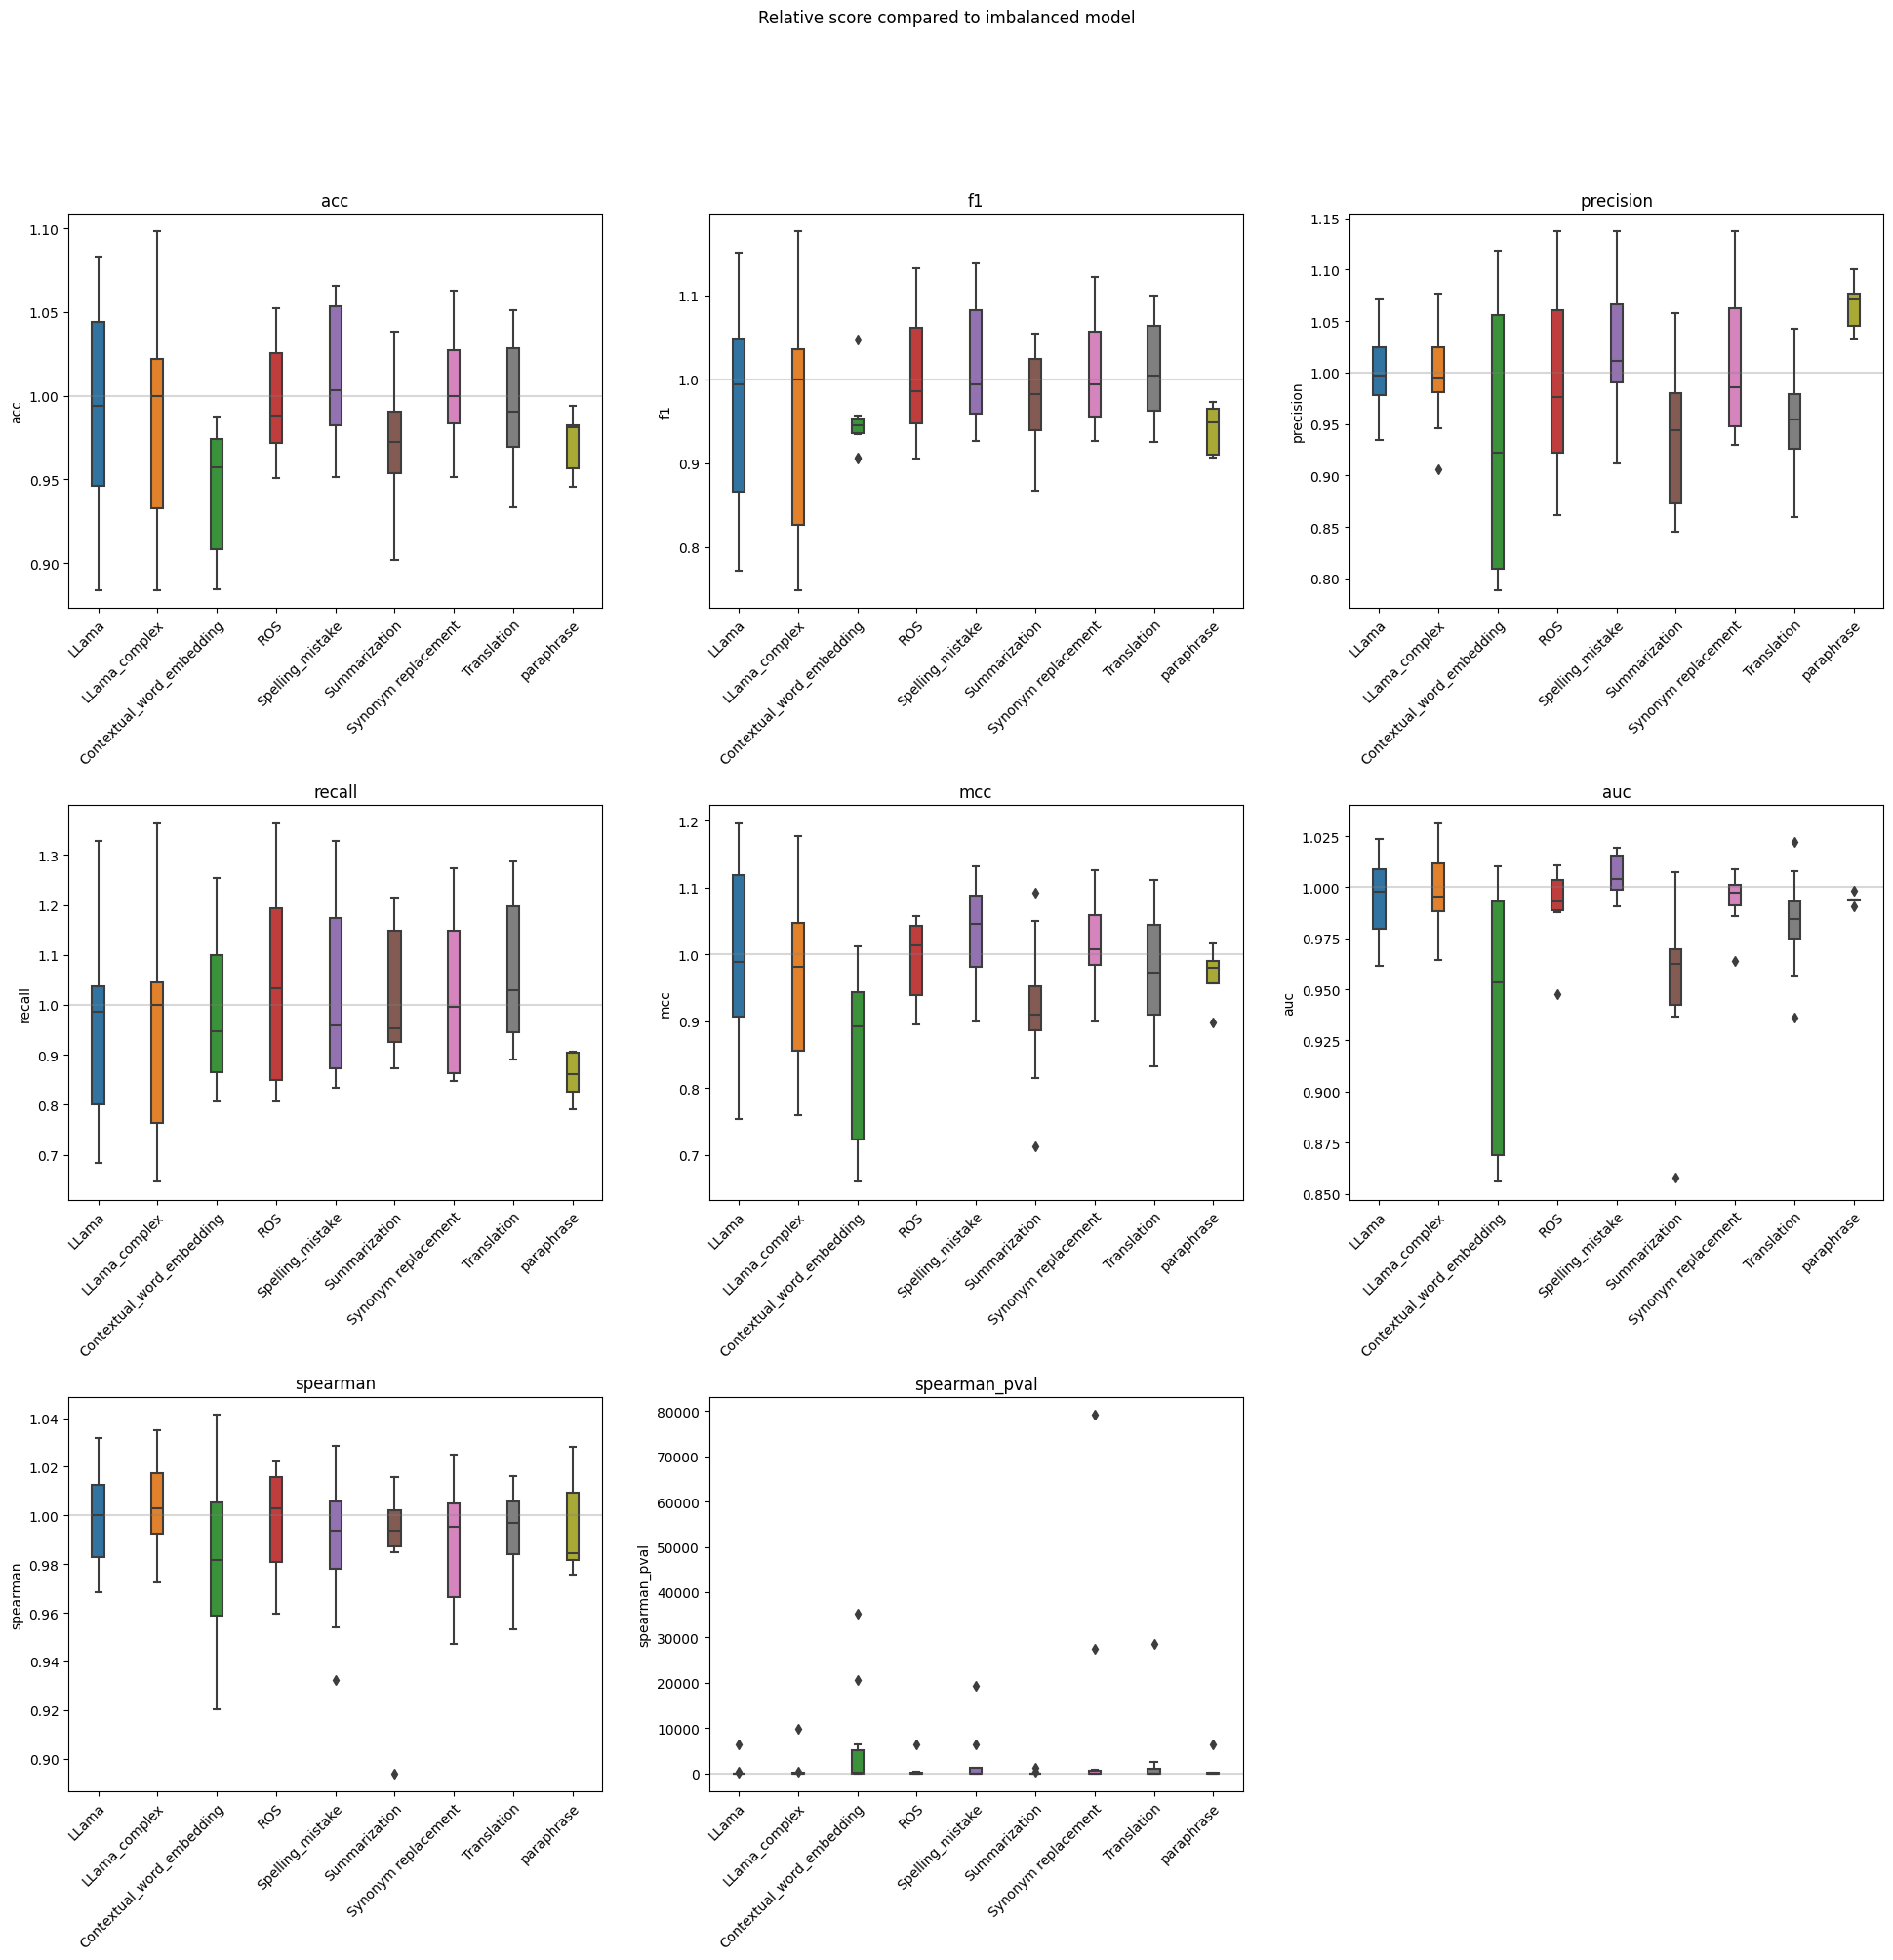

In [72]:

boxplot(df_relative, grouping = "Balancing method", title="Relative score compared to imbalanced model", relative = True)

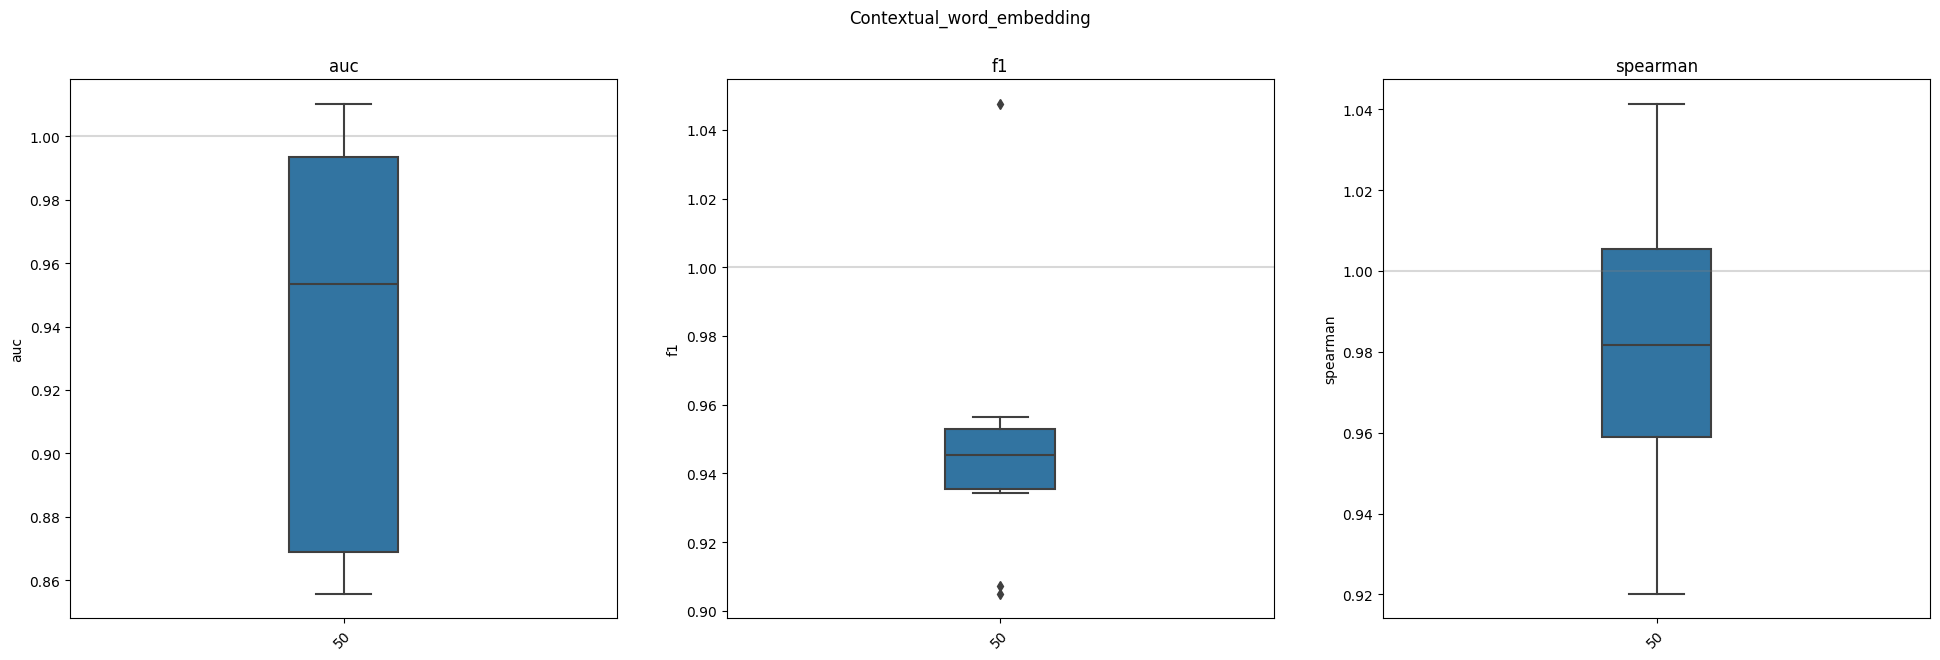

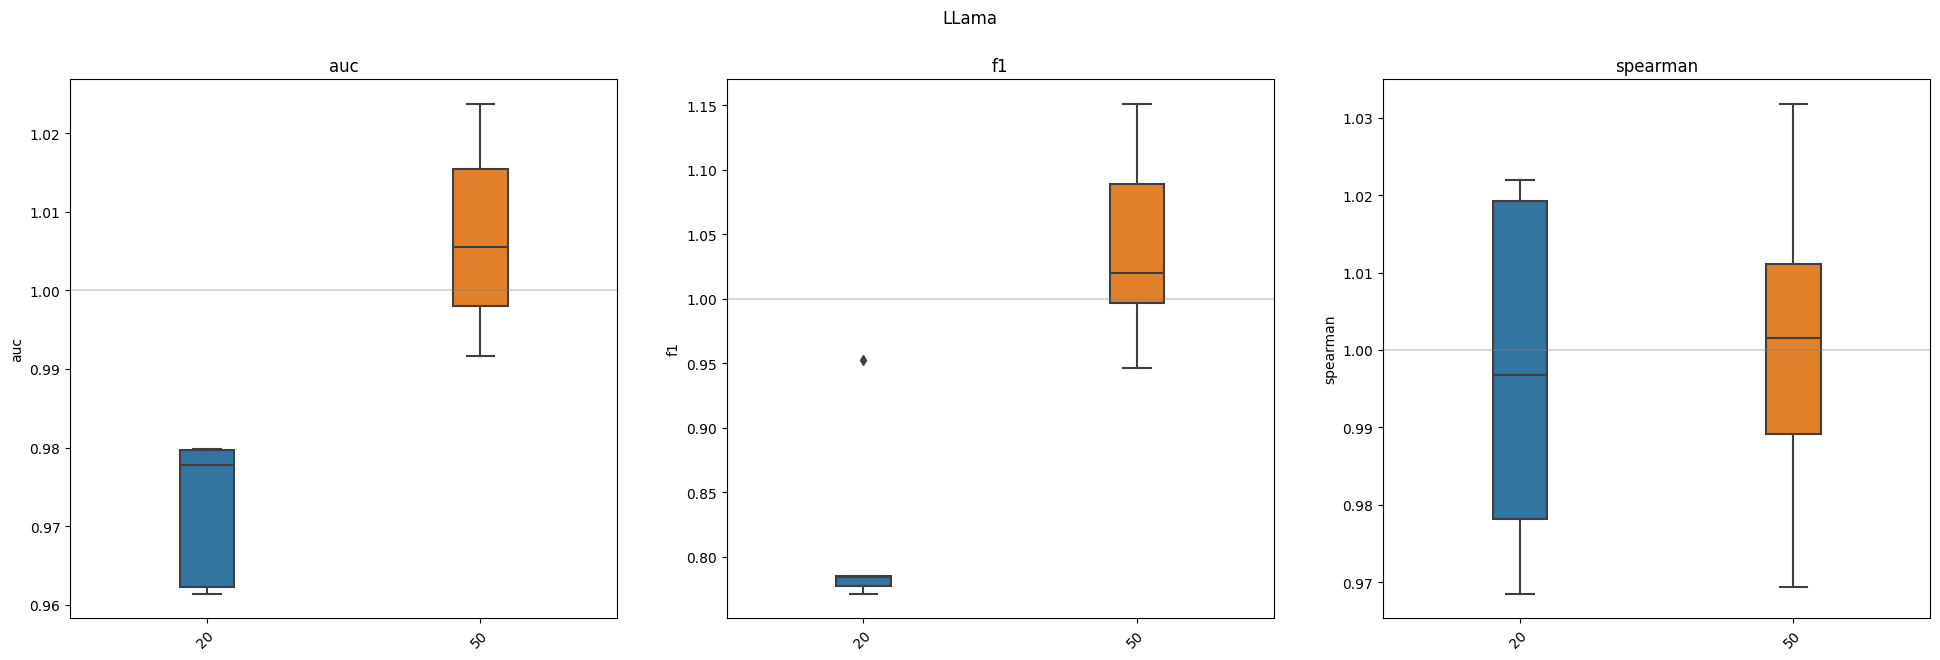

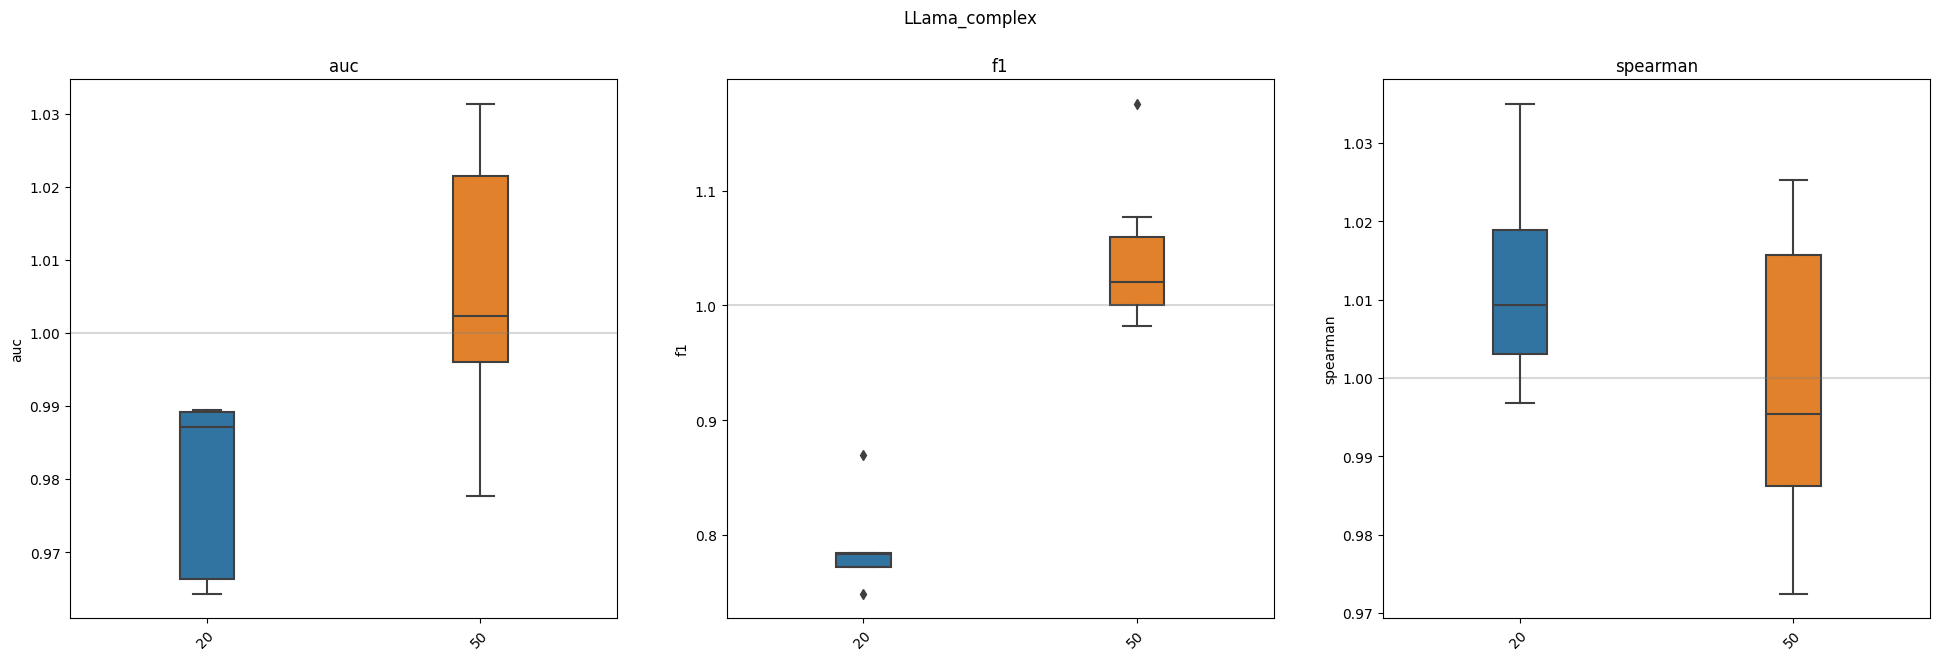

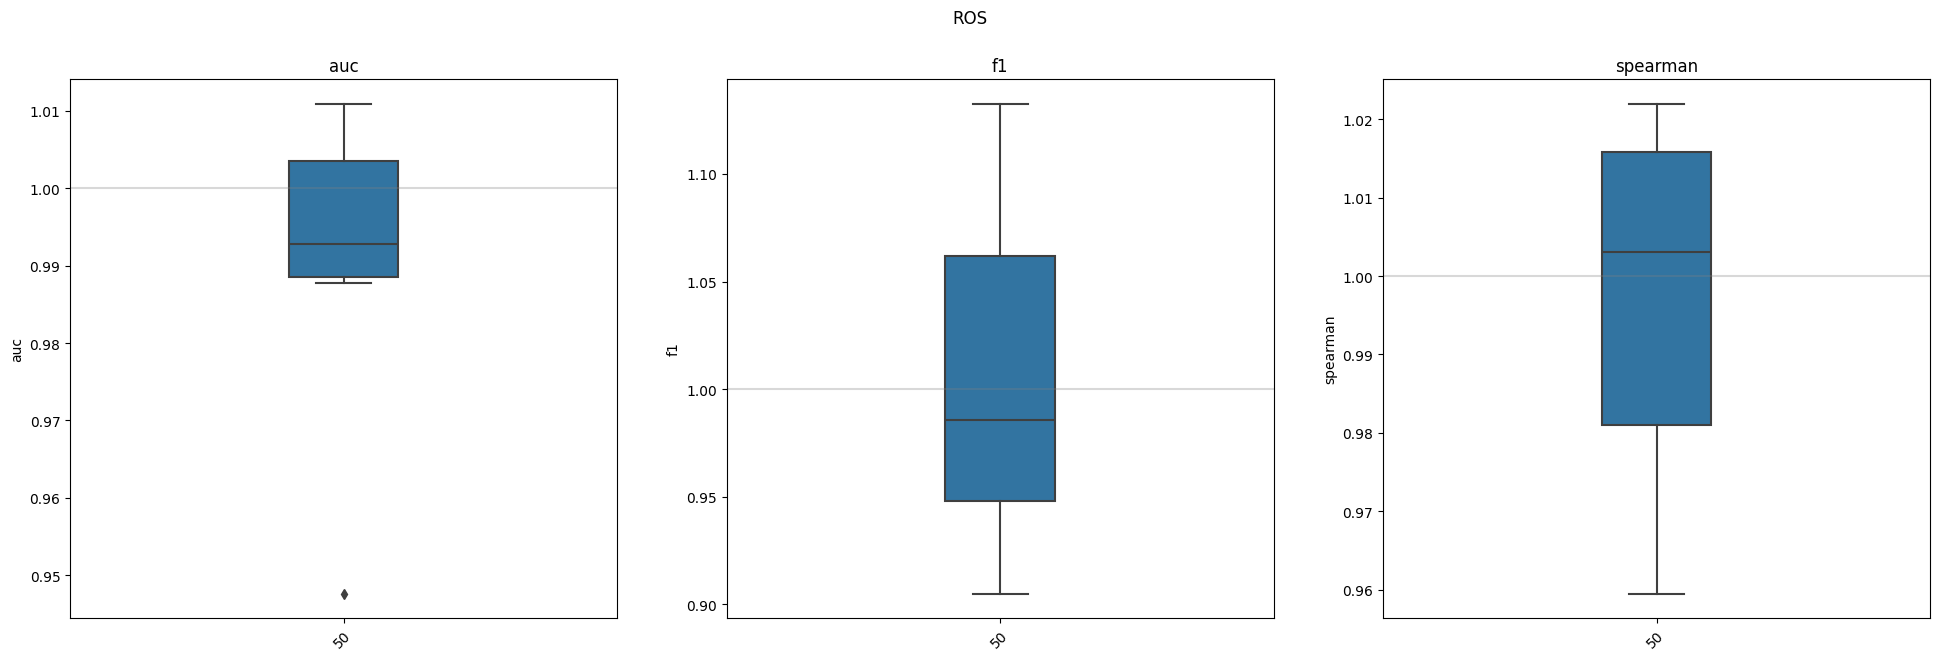

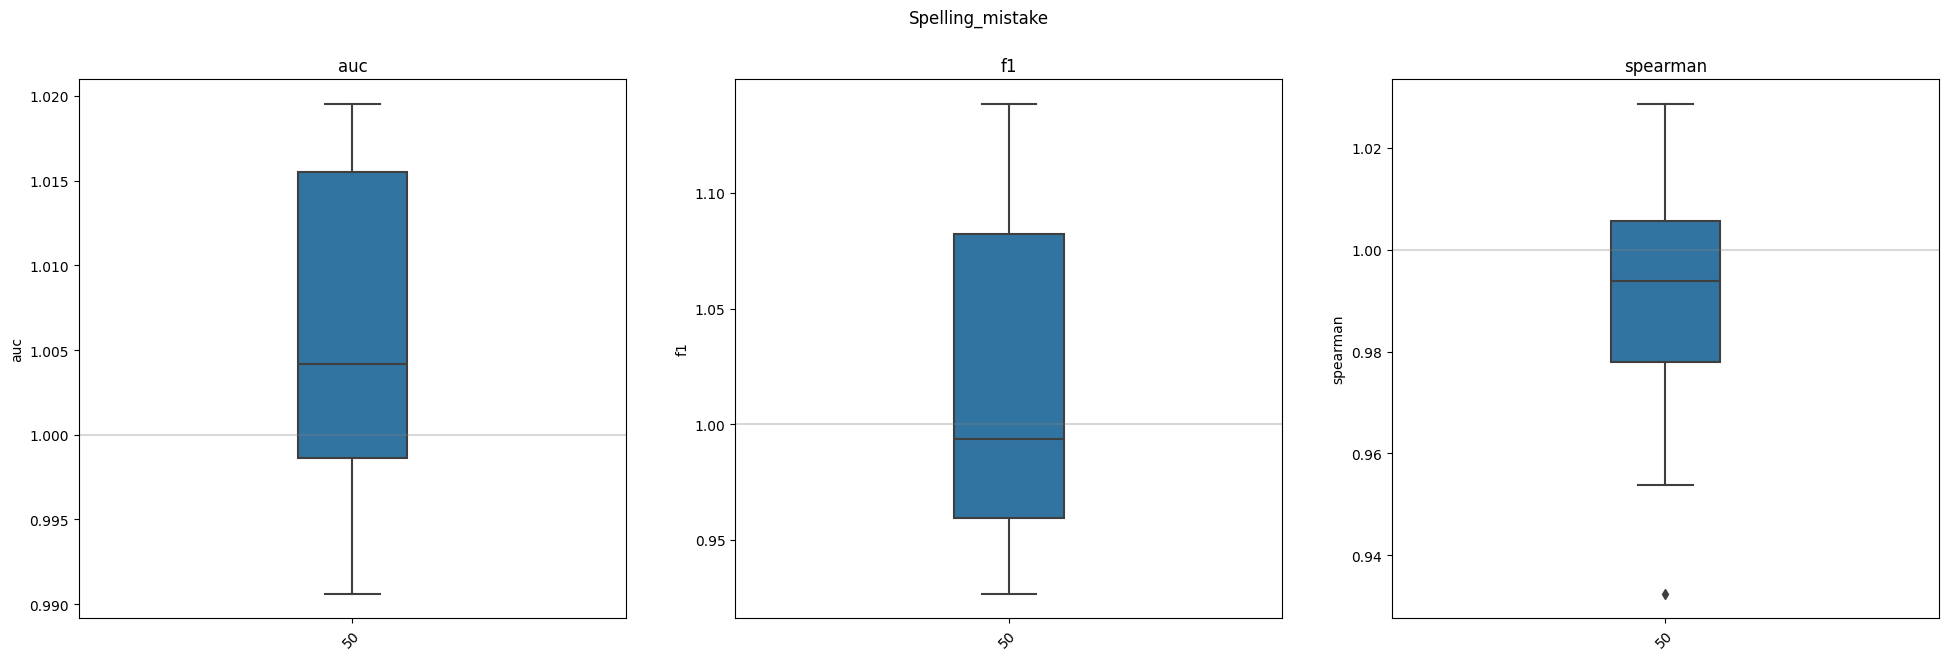

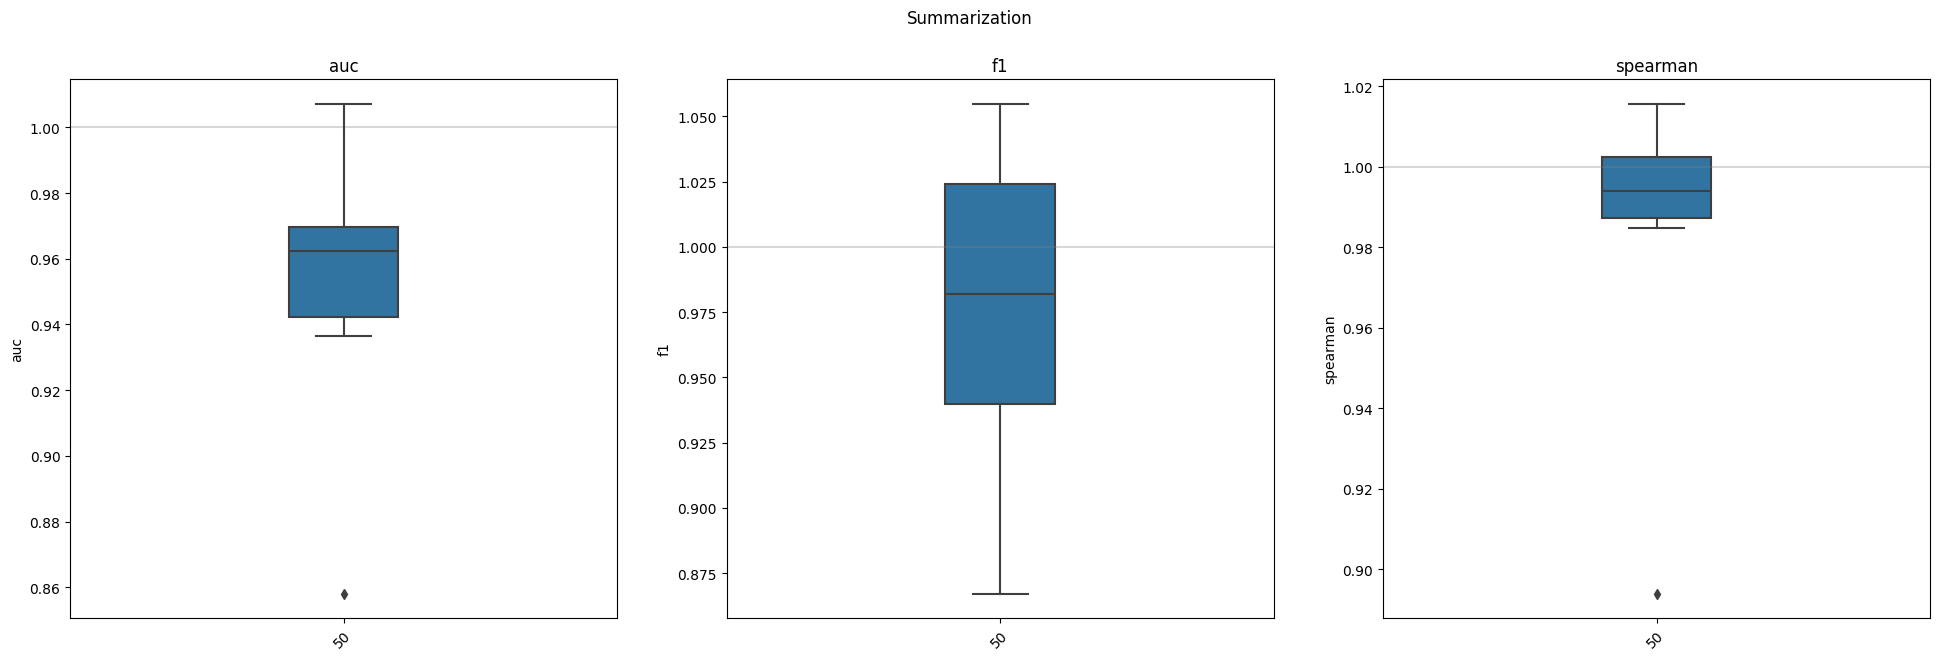

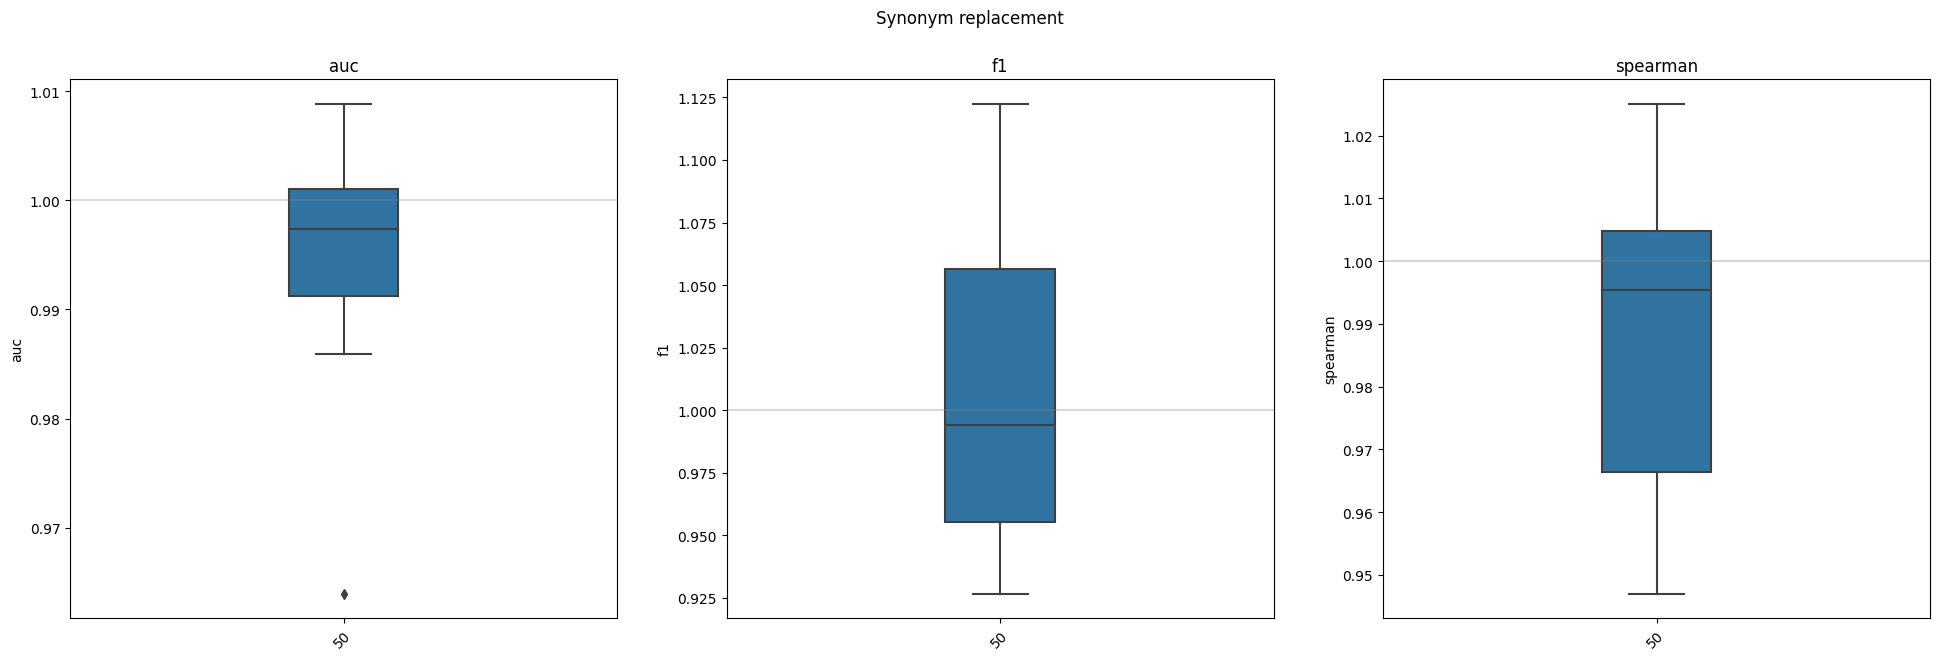

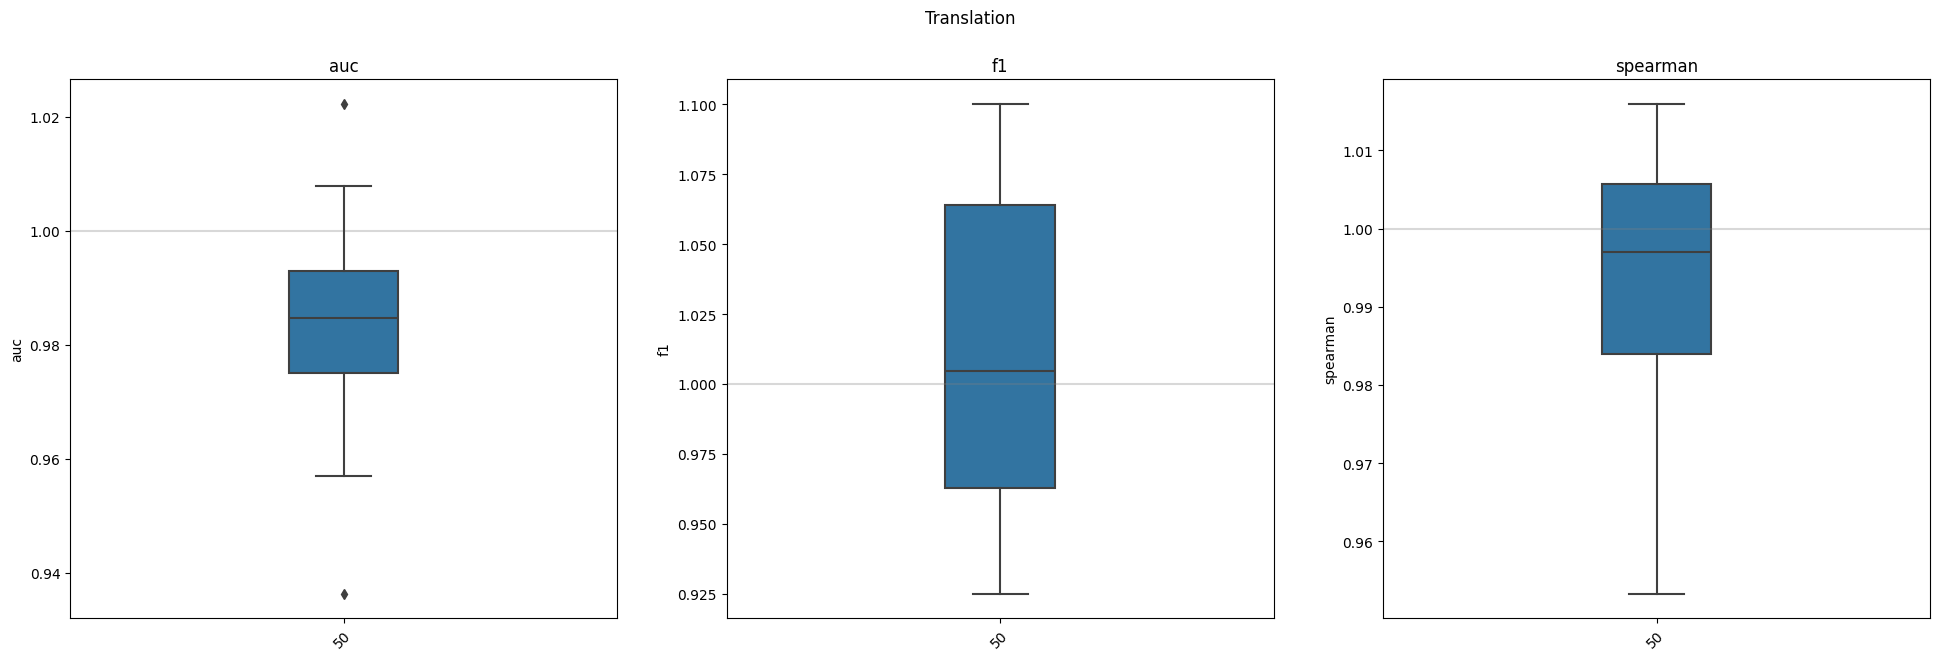

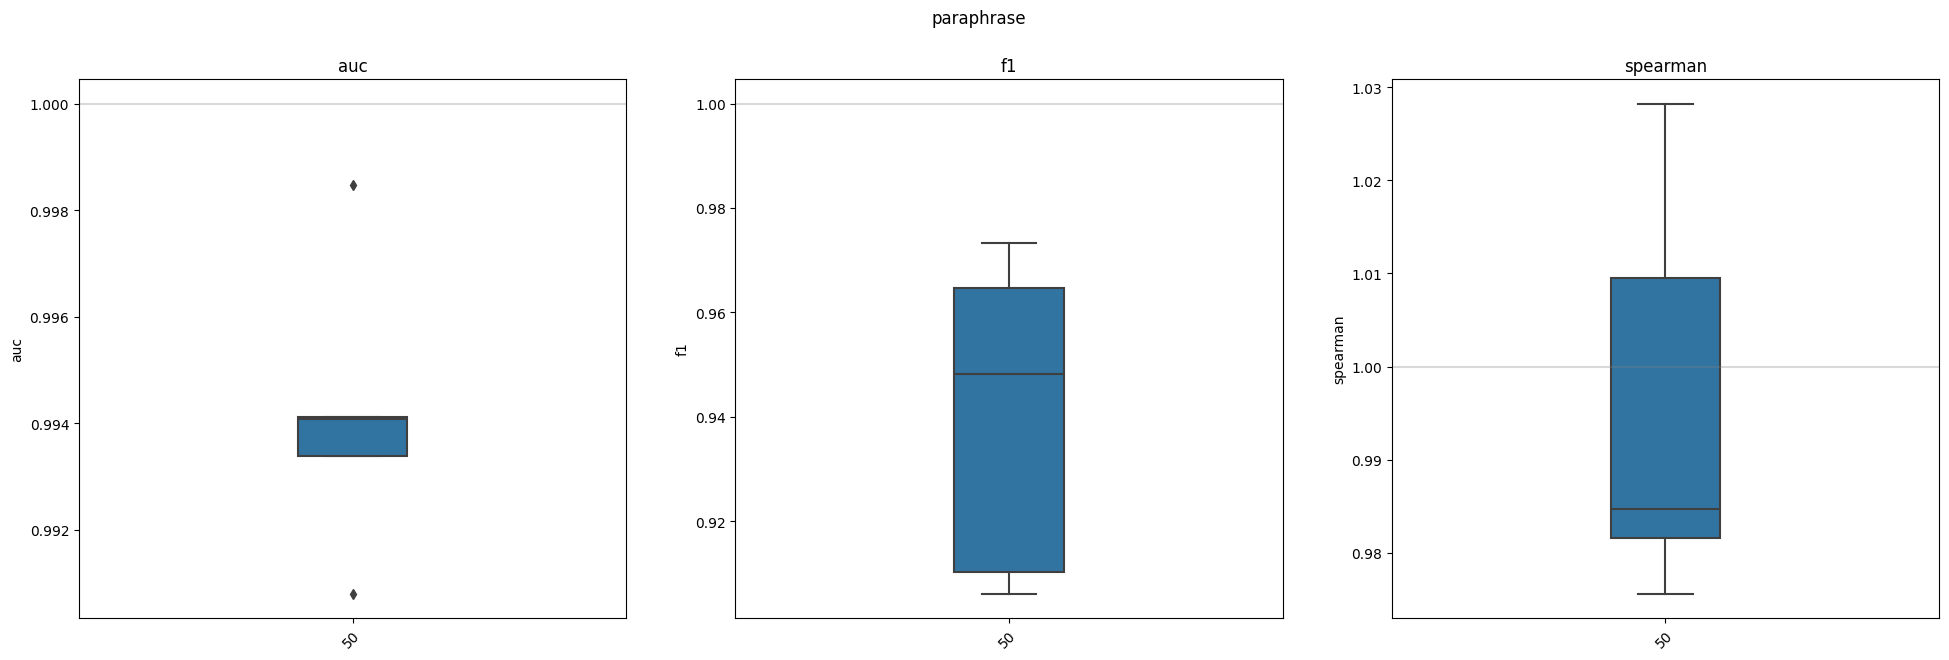

In [76]:
for method in np.unique(df_relative["Balancing method"]):
    if method=="original":continue
    df_tmp = df_relative[df_relative["Balancing method"]==method].reset_index(drop=True)
    boxplot(df_tmp, ["auc", "f1", "spearman"], grouping = "Imbalance %", title=method, relative = True)

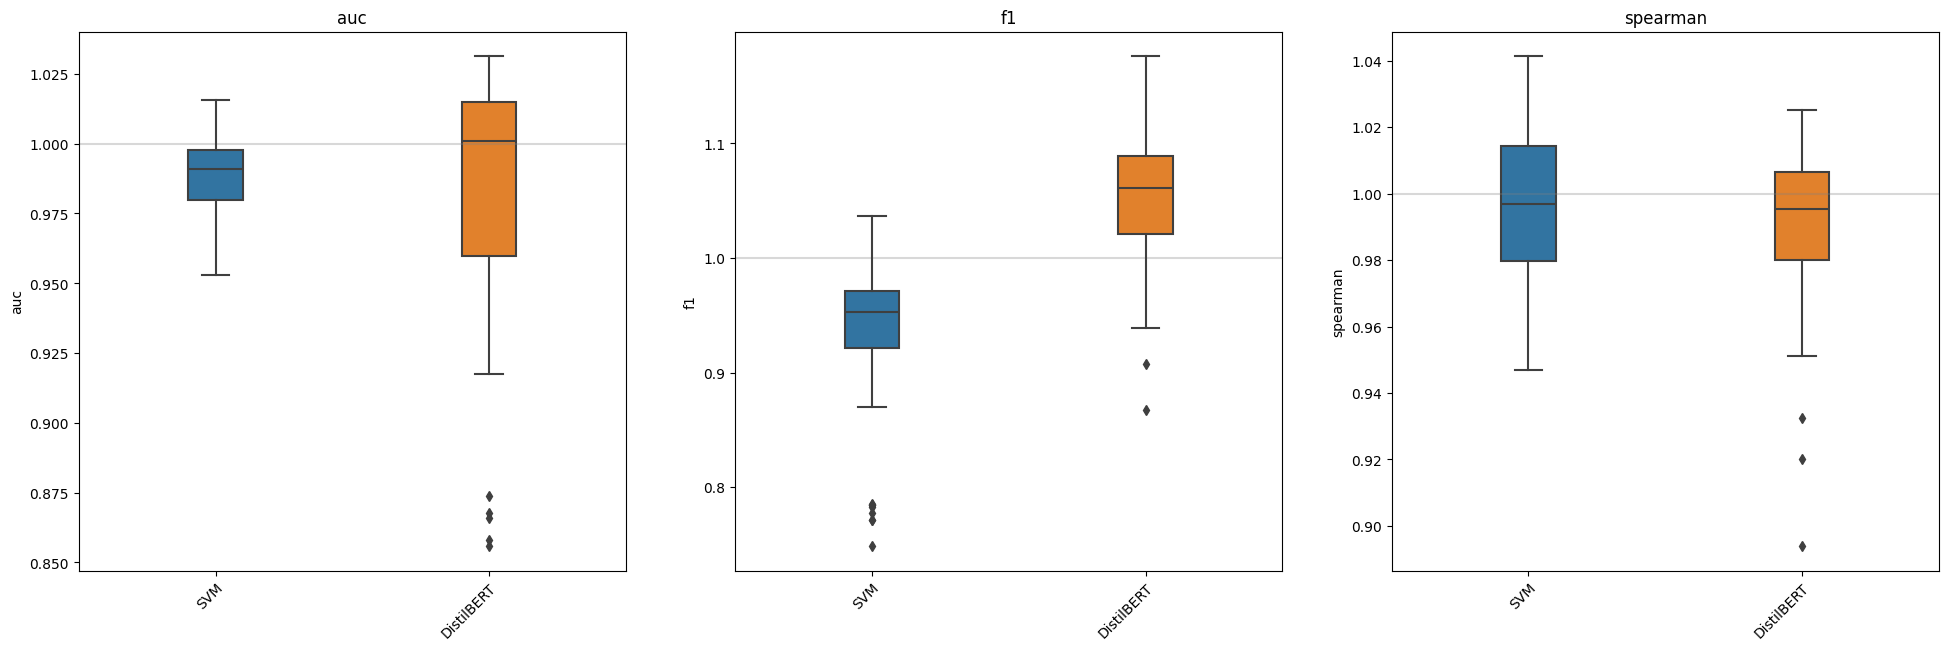

In [78]:
boxplot(df_relative, ["auc", "f1", "spearman"], grouping = "Model name", relative = True)